> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Medical appointments no show)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Dataset selected**: [No-show appointments](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv)

**Dataset Description**: This dataset contains information of 100k medical appointments in Brazil. Focused is on whether patients show up for respective appointment. Patient characteristics are listed out in each row.
- **`PatientId`**: indicates unique ID of specific patient; ID duplication possible in cases where patients book more than one appointment.
- **`AppointmentID`**: indicates unique ID of each respective patient appointment
- **`Gender`**: indicates patient gender (M/F)
- **`ScheduledDay`**: indicates the date and/or time of each patient appointment
- **`AppointmentDay`**:  indicates the date and/or time the patient called in to book one's appointment.
- **`Age`**: indicates age of patient.
- **`Neighborhood`**: indicates the location of  hospital.
- **`Scholarship`**: indicates if patient has enrolled in Brasilian welfare program Bolsa Família.
- **`Hipertension`**: indicates if patient is experiencing Hypertension.
- **`Diabetes`**: indicates if patient is experiencing Diabetes.
- **`Alcoholism`**: indicates if patient is experiencing Alcoholism.
- **`Handcap`**: indicates if patient has special needs.
- **`SMS_received`**: indicates if patient has received a text message reminder of scheduled appointment.
- **`Show-up`**: ‘No’ if patient did show up for respective appointment, ‘Yes’ if patient did not show up for respective appointment

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# This dataset has 14 columns and 110527 rows.

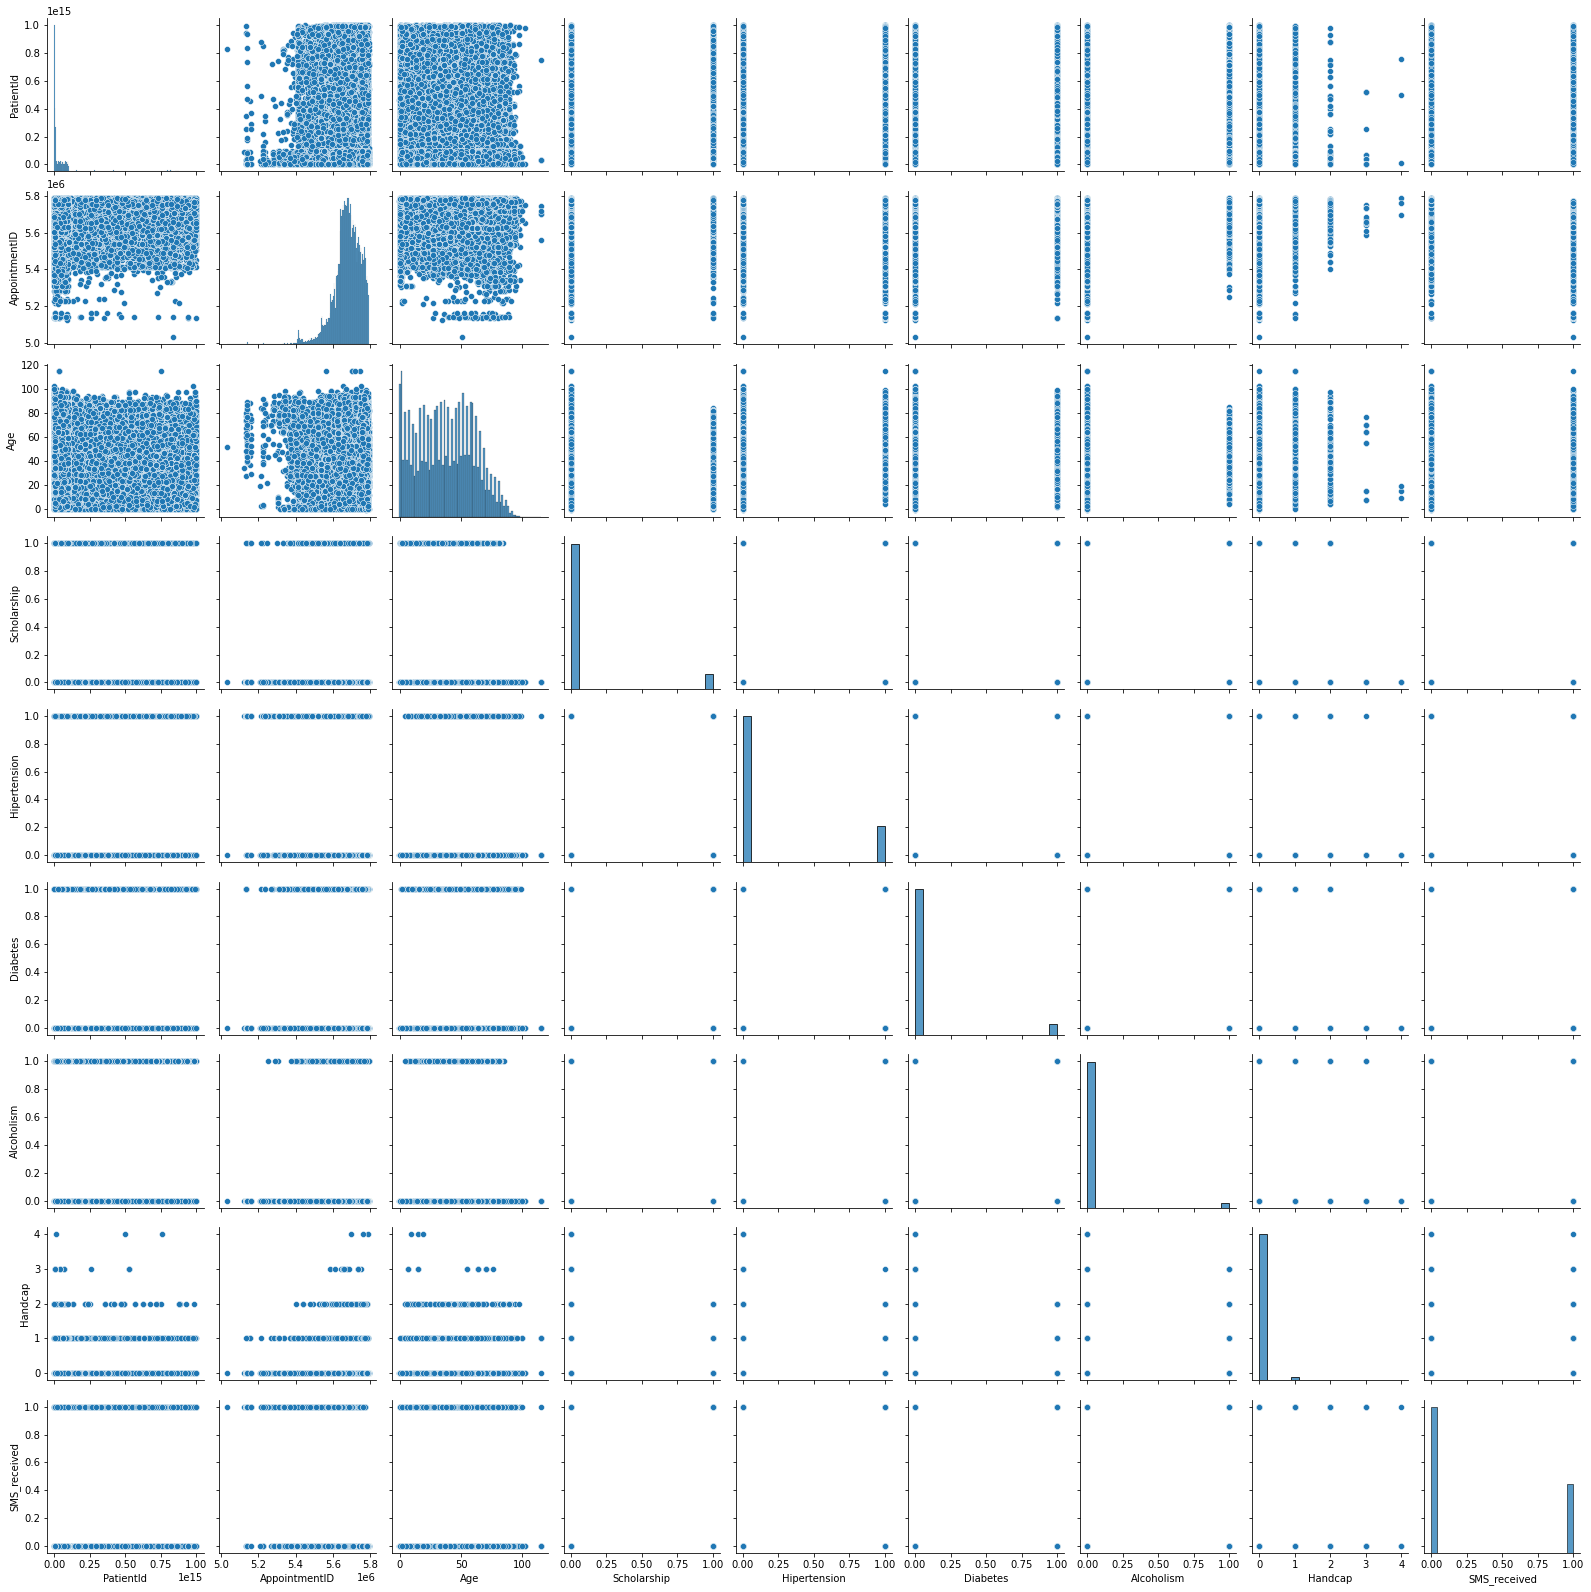

In [6]:
# 1. Identifying data format and data types of each column helps determine the best data analysis strategy to approach this dataset.

sns.pairplot(df);

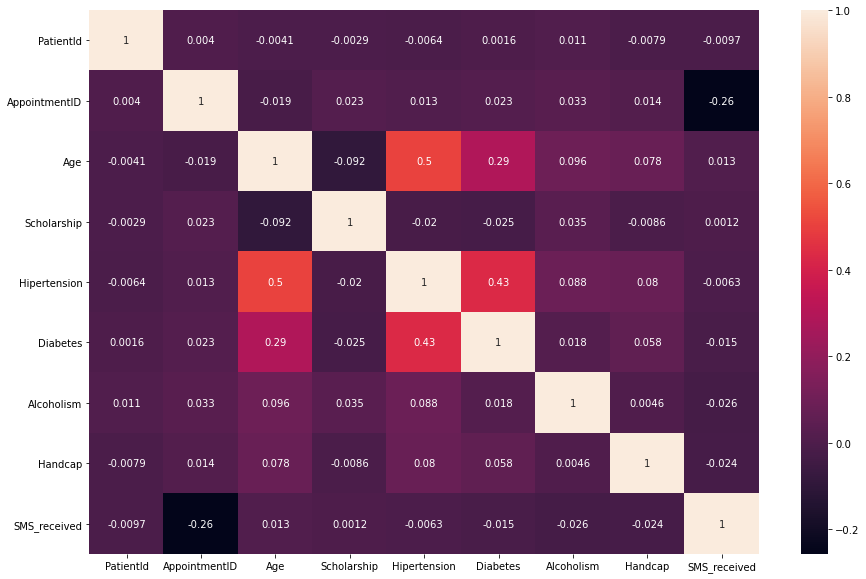

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

# The heatmap shows there is some degree of correlation between Age and Hypertension, and to a less extent, between Hypertension and Diabetes.

In [8]:
# The charts above show that the dataframe contains two types of data:

# 1. Categorical data: Gender, Diabetes, Alcoholism, Handcap, SMS_received, No-show
# 2. Quantitative data: PatientId, AppointmentID, Age, ScheduledDay, AppointmentDay

In [9]:
# 2. Identifying the exact data types of each column + confirming the data analysis strategy for each column:

In [10]:
# Validate missing values:

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [11]:
# The cell above shows there are no missing values.

In [12]:
# Validate duplicated values:

df.duplicated().sum()

0

In [13]:
# Check if there were any duplicated appointmentID:

sum(df.AppointmentID.duplicated())

0

In [14]:
# The cell above shows there are no duplicates in the 'AppointmentID' column.

In [15]:
sum(df.PatientId.duplicated())

48228

In [16]:
df.PatientId.value_counts().head(5)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
Name: PatientId, dtype: int64

In [17]:
# The cells above show the PatientId column contains repeated values. This means some patients booked for more than one appointment.

# The output of the `value_counts()` function reveals the top 5 patients that have booked the biggest number of appointments.

# Based on that information, the data analysis will rely mainly on the appointment count,rather than patients count. However, the number of patients will still be referenced where applicable to help identify any correlation between specific patterns and the diversity of the studied groups.

In [18]:
# 3. Identifying incorrect data validation (Depending on the nature of each column)

In [19]:
# Check for zero/negative AppointmentID values

df[df.AppointmentID < 0]['AppointmentID']

Series([], Name: AppointmentID, dtype: int64)

In [20]:
# Check for zero/negative PatientId values

df[df.PatientId <= 0]['PatientId']

Series([], Name: PatientId, dtype: float64)

In [21]:
# Check for values in the Gender column

df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [22]:
df['ScheduledDay'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

In [23]:
df['AppointmentDay'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [24]:
# The above cell shows the AppointmentDay column has all values with time portion set to zero, therefore, the time aspect of appointment is not to be included in this data analysis.

In [25]:
# Check for values in the Age column

df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [26]:
# The above cell shows that for Age values, there is one record that is of negative value (-1). With little explanation provided by the dataset documentation on www.Kaggle.com, this particular negative value is to be temporarily excluded from this data analysis under further explanation can be provided.

In [27]:
# Check if the Age column has negative values;
# Accept patients with Age value of 0 assuming they represent newborns less than one year old

df[df.Age < 0]['Age']

99832   -1
Name: Age, dtype: int64

In [28]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [29]:
df['Neighbourhood'].nunique()

81

In [30]:
df['Scholarship'].unique()

array([0, 1])

In [31]:
df['Hipertension'].unique()

array([1, 0])

In [32]:
df['Diabetes'].unique()

array([0, 1])

In [33]:
df['Alcoholism'].unique()

array([0, 1])

In [34]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

In [35]:
# Looking at the values in the Handcap column, we see 5 values (0,1,2,3,4)

In [36]:
df['SMS_received'].unique()

array([0, 1])

In [37]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

**Summary:** Each column in the datafile is examined individually to confirm the existence of any data errors, so they can be fixed. Data types for each column are identified and used to determine how the data analysis is going to be conducted. Information is shown below:

- **`PatientId`**: (Quantitative - Discrete): as mentioned above, a number of patients have more than one appointment; this column will be used in the analysis as applicable.
- **`AppointmentID`**: Quantitative - Discrete (unique values): will be considered the primary key in our dataset;
- **`Gender`**: (Categorical - Nominal)
- **`ScheduledDay`**: (Quantitative - Continuous): we will use the date section only to calculate the waiting duration between the appointment booking date and the appointment date.
- **`AppointmentDay`**:  (Quantitative - Continuous): we will use the date section only to calculate the waiting duration between the appointment booking date and the appointment date and to create a new column (DayOfWeek).
- **`Age`**: (Quantitative - Continuous): we will use this column to create age groups.
- **`Neighborhood`**: (Categorical - Nominal) we will limit our analysis to top 20 neighbourhoods that have the highest numbers of appointments.
- **`Scholarship`**: (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **`Hipertension`**: (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **`Diabetes`**: (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **`Alcoholism`**: (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **`Handcap`**: (Categorical - Ordinal): we will use this column to categorize our results as applicable.
- **`SMS_received`**: (Categorical - Nominal): we will use this column to categorize our results as applicable.
- **`Show-up`**: (Categorical - Nominal): we will use this column to categorize our results as applicable.

In order to present our data in an informative way, we will create data ranges for specific variables (Age & Waiting duration); elect data groups with the highest frequencies within certain variables (Neighbourhoods) and define functions to help us organize, summarize, and plot our data.

## Data Cleaning/Preparation

In [38]:
# Rename Columns

df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [39]:
new_labels = ['Patient_ID', 'Appointment_ID', 'Gender', 'Scheduled_Day',
       'Appointment_Day', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_Received', 'No_Show']
df.columns = new_labels
df.head(1)

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [40]:
# Convert PatientID to integer

df['Patient_ID'] = df['Patient_ID'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Patient_ID       110527 non-null  int64 
 1   Appointment_ID   110527 non-null  int64 
 2   Gender           110527 non-null  object
 3   Scheduled_Day    110527 non-null  object
 4   Appointment_Day  110527 non-null  object
 5   Age              110527 non-null  int64 
 6   Neighbourhood    110527 non-null  object
 7   Scholarship      110527 non-null  int64 
 8   Hypertension     110527 non-null  int64 
 9   Diabetes         110527 non-null  int64 
 10  Alcoholism       110527 non-null  int64 
 11  Handicap         110527 non-null  int64 
 12  SMS_Received     110527 non-null  int64 
 13  No_Show          110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [41]:
# Convert AppointmentDay and ScheduledDay from String to DateTime format
# Create 2 columns for: appointment booking date and the appointment date
# Since the Appointment times were set to 00:00:00 in respect to all the appointments, the data analysis will not include the appointment time.

# Appointment Date
df['Appointment_Date'] = pd.to_datetime(df['Appointment_Day']).dt.date
df['Day_Of_Week'] = pd.to_datetime(df['Appointment_Day']).dt.day_name()
df.drop('Appointment_Day',axis=1, inplace = True)

In [42]:
# Appointment Booking Date
df['Scheduled_Date'] = pd.to_datetime(df['Scheduled_Day']).dt.date
df.drop('Scheduled_Day',axis=1, inplace = True)

In [43]:
# Create one new column to show the Waiting Duration (in terms of days) between the scheduling date and appointment date

df['Waiting_Duration'] = df['Appointment_Date']-df['Scheduled_Date']

In [44]:
df.head()

,Patient_ID,Appointment_ID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Appointment_Date,Day_Of_Week,Scheduled_Date,Waiting_Duration
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0 days
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0 days
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0 days
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,Friday,2016-04-29,0 days
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,Friday,2016-04-29,0 days


In [45]:
df[df['Waiting_Duration'] < '0 days']

,Patient_ID,Appointment_ID,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Appointment_Date,Day_Of_Week,Scheduled_Date,Waiting_Duration
27033,7839272661752,5679978,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-09,Monday,2016-05-10,-1 days
55226,7896293967868,5715660,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-17,Tuesday,2016-05-18,-1 days
64175,24252258389979,5664962,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-04,Wednesday,2016-05-05,-1 days
71533,998231581612122,5686628,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-05,Thursday,2016-05-11,-6 days
72362,3787481966821,5655637,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-03,Tuesday,2016-05-04,-1 days


In [46]:
# The cells above reveal that there are 5 appointments where the appointment was booked after the actual appointment.
# By checking the NoShow column, it shows that none of the patients who booked these appointment did show up (NoShow = Yes).
# Since the dataset documentation provides no explanation for these particular appointments, these appointments shall be excluded from the data analysis.

In [47]:
# By excluding these 5 records with negative values for waiting duration, the size of the dataset is 110527-5=110522.

df = df[df['Appointment_Date'] >= df['Scheduled_Date']]
df.shape

(110522, 16)

In [48]:
# The negative Age values shall be excluded

df = df[df.Age != -1]
df.shape

(110521, 16)

In [49]:
# The values in respect to Gender, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_Received,Day_Of_Week columns shall be updated to make them more user-friendly

df['Gender'] = df.Gender.astype('category')
df.Gender.cat.rename_categories(['Female','Male'], inplace = True)

df['Scholarship'] = df.Scholarship.astype('category')
df.Scholarship.cat.rename_categories(['No Scholarship','Scholarship'], inplace = True)

df['Hypertension'] = df.Hypertension.astype('category')
df.Hypertension.cat.rename_categories(['No Hypertension','Hypertension'], inplace = True)

df['Diabetes'] = df.Diabetes.astype('category')
df.Diabetes.cat.rename_categories(['No Diabetes','Diabetes'], inplace = True);

df['Alcoholism'] = df.Alcoholism.astype('category')
df.Alcoholism.cat.rename_categories(['No Alcoholism','Alcoholism'], inplace = True);

df['Handicap'] = df.Handicap.astype('category')
df.Handicap.cat.rename_categories(['No Handicap','Handicap L1','Handicap L2', 'Handicap L3', 'Handicap L4'], inplace = True);

df['SMS_Received'] = df.SMS_Received.astype('category')
df.SMS_Received.cat.rename_categories(['No SMS_received','SMS_received'], inplace = True);

df['Day_Of_Week'] = df.Day_Of_Week.astype('category')
df.Day_Of_Week.cat.reorder_categories(['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered = True, inplace = True)

In [50]:
# The Waiting_Duration column values shall be converted to integer data type for easier data filtering

df['Waiting_Duration'] = (df.Appointment_Date - df.Scheduled_Date).astype('timedelta64[D]').astype(int)

In [51]:
# A new column shall be defined to include the Age Groups

AgeGroupLabels = [ "{0} - {1}".format(i, i + 19) for i in range(0, 120, 20)]
df['Age_Group'] = pd.cut(df.Age, range(0, 121, 20), right=False, labels=AgeGroupLabels)
df['Age_Group'] = df.Age_Group.astype('category')
df.Age_Group.cat.categories

Index(['0 - 19', '20 - 39', '40 - 59', '60 - 79', '80 - 99', '100 - 119'], dtype='object')

In [52]:
# The cell above shows a total of 6 Age groups (in terms of years) ranging from 0 to 119 with an interval of 20 years

In [53]:
# A new column shall be defined to include the Waiting Duration Groups

WaitingDurationGroupLabels = [ "{0} - {1}".format(i, i + 29) for i in range(0, 180, 30)]
df['Waiting_Duration_Groups'] = pd.cut(df.Waiting_Duration, range(0, 181, 30), right=False, labels=WaitingDurationGroupLabels)
df['Waiting_Duration_Groups'] = df.Waiting_Duration_Groups.astype('category')
df.Waiting_Duration_Groups.cat.categories

Index(['0 - 29', '30 - 59', '60 - 89', '90 - 119', '120 - 149', '150 - 179'], dtype='object')

In [54]:
# The cell above shows a total of 6 waiting duration groups (in terms of days) ranging from 0 to 179 days with an interval of 30 days.

In [55]:
# The dataset shall be limited to those with appointments having No-Show value 'yes'

No_Show_df = df[df['No_Show'] == 'Yes']

In [56]:
# Given that the number of Neighbourhoods is quite large (81 in total), the data analysis shall be limited to the top 20 Neighbourhoods with the highest numbers of appointments.

In [57]:
# A new dataframe shall be created to limit patients to those who are based in one of the top 20 neighbourhoods with the highest numbers of appointments.

# First, a list is created consisting the top 20 neighbourhoods with the highest numbers of appointments.

top_20_Nbrhd_list = list(df['Neighbourhood'].value_counts().nlargest(20).index)

## Then, a new dataframe is created based upon the list just created

df_top_20_Nbrhd = df[df['Neighbourhood'].isin (top_20_Nbrhd_list)]

## Last, data filtering is applied to the 'No-Show' column to include 'Yes' values only

df_top_20_Nbrhd_NoShow = df_top_20_Nbrhd[df_top_20_Nbrhd['No_Show']=='Yes']

### Questions

1. What is the overall appointment show-up rate vs no show-up rate?
2. What are the proportions of the different categories within each variable and the show-up rates broken down by category?
3. Given the appointments where patients didn't show up, what is percentage of recurring patients vs. new patients?
4. For each pair of variables, calculate the proportions of category combinations to identify the largest group of patients who didn't show-up. A step-by-step process will be provided to explain how this step will be performed. The purpose of this analysis is to serve as a starting point to identifying the factors that they may be contributing to the patients missing their appointments.

Before proceeding to answering the questions above, a number of functions shall be defined to help with analysis. The functions are shown below:

In [58]:
# A new function is created to generate a bar plot frequency table

def Show_No_Show_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.No_Show, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2,
                height + 2,
                str(height)+'%',
                ha='center',
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [59]:
# An updated version of Show_No_Show_bar_plot with different font formatting to match the number of column categories

def Show_No_Show_bar_plot_V2(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.No_Show, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(stacked = True, figsize=(20,10));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 45, fontsize = 12);
    ax.set_title('ShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2,
                height + 2,
                str(height)+'%',
                ha='center',
                va='bottom',
                fontsize = 12)
    return df_by_Group

In [60]:
# The function below is created to calculate the plot the group proportions based on the variable 'number of appointments'

def PropByVar(df, variable):
    df_pie = df[variable].value_counts()
    ax = df_pie.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12);
    ax.set_title(variable + ' (%) (Per appointment)\n', fontsize = 15);
    return np.round(df_pie/df.shape[0]*100,2)

In [61]:
# The function below is created to calculate the plot the group proportions based on the variable 'number of patients'

def NumOfPatients(df, variable):
    PatID_Count = pd.pivot_table(df, index=variable, values='Patient_ID',aggfunc = lambda x: len(x.unique()))
    ax = PatID_Count.plot.pie(figsize=(10,10), autopct='%1.2f%%', subplots=True, fontsize = 12, legend = False);
    plt.title(variable + ' (%) (Per patient)\n', fontsize = 15);
    return np.round(PatID_Count/sum(PatID_Count['Patient_ID'])*100,2)

In [62]:
# The function below is created to plot the no-show % for two variables (i.e. gender and hypertension)

def NoShowBy2Vars(df,var1, var2):
    Freq_df = pd.crosstab(df[var1], columns = df[var2], normalize = 'index')
    Freq_df = np.round(Freq_df * 100,2)
    ax = Freq_df.plot.barh(stacked = True,figsize=(10,5));
    ax.set_title('\nNo ShowUp (%) (by ' + str(var1) + ' & '+ str(var2) + ')\n', fontsize = 15);
    ax.set_ylabel(Freq_df.index.name, fontsize = 12)
    ax.set_xlabel('(%)', fontsize = 12)
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:3.0f}%'.format(x) for x in vals])
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    return Freq_df

In [63]:
def Recurring_Patient_prct(df,var1,var2):

    # Pivot table to calculate the patientID count
    PatID_Count = pd.pivot_table(df, index=var1, columns=var2, values='Patient_ID',aggfunc = lambda x: len(x.unique()))

    # Pivot table to calculate the AppointmentID count
    AptID_Count = pd.pivot_table(df, index=var1, columns=var2, values='Appointment_ID',aggfunc='count')

    # Divide the two tables above to calculate the percentage and return the resulting table.
    Div_chck = np.round((1 - PatID_Count/AptID_Count)*100,2)

    ax = Div_chck.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(Div_chck.index,rotation = 0, fontsize = 15);
    ax.set_title('\nRecurring Patients (%)\n', fontsize = 15)
    ax.set_xlabel(Div_chck.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

    # Add Data Labels

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2,
                height + 2,
                str(height)+'%',
                ha='center',
                va='bottom',
                fontsize = 12)

    return Div_chck

In [64]:
# Create a function to calculate the difference between the max and min show-up % Dimension

def RateVariance (df):
    print(' Max ShowUp (%): ', df['Yes'].max(),'%\n',
          'Min ShowUp (%):', df['Yes'].min(), '%\n',
          'Variance (%):',str(np.round(df['Yes'].max() - df['Yes'].min(),2)),'%')

### Research Question 1: What is the overall appointment show-up vs. no show-up rate?

No     79.81
Yes    20.19
Name: No_Show, dtype: float64

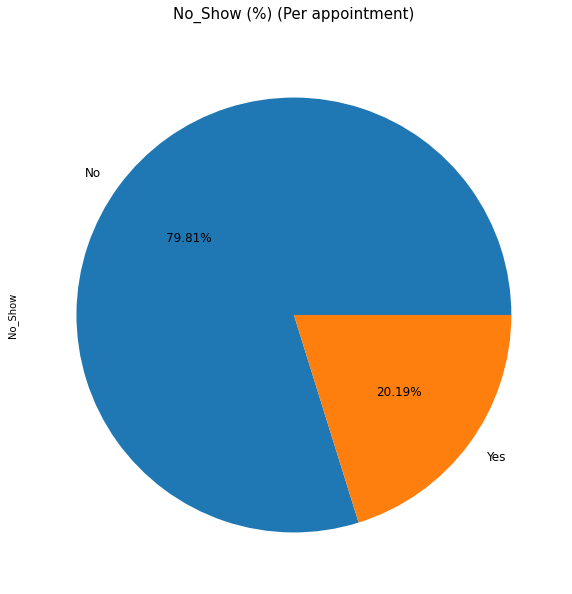

In [65]:
PropByVar(df, 'No_Show')

In [66]:
# The pie-chart above shows that the overall show-up rate is 79.81% (based on the number of appointments, not the number of patients).

### Research Question #2: What are the proportions of the different categories within each variable and the show-up rates broken down by category?

In [67]:
# To answer question 2, the following data is required:
# 1. The category proportions within each variable (= per appointment and per patient) + present these proportions (%) on a pie chart
# 2. The Show-up vs. No Show-up (%) for each category within each variable + plot the results in a bar chart + calculate the variance between the highest & lowest show-up rate

Female    65.0
Male      35.0
Name: Gender, dtype: float64

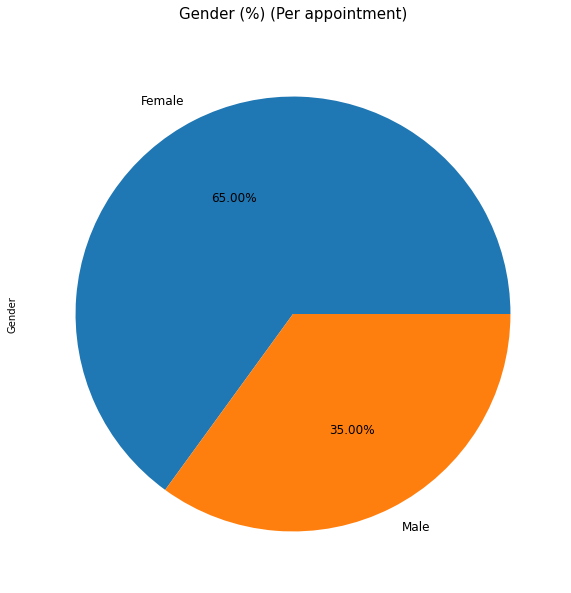

In [68]:
# 2.1: in terms of Gender

PropByVar(df, 'Gender')

In [69]:
# The pie chart above shows that the appointment proportion where patients are males is 35.00% and that of females is 65.00%.

,Patient_ID
Gender,
Female,64.28
Male,35.72


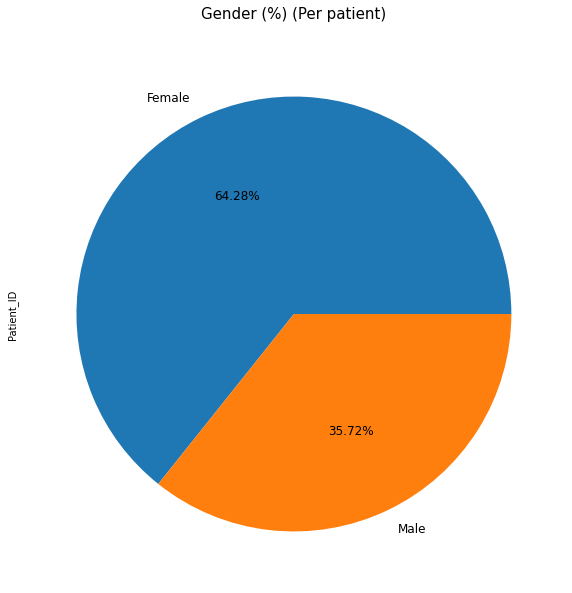

In [70]:
NumOfPatients(df, 'Gender')

In [71]:
# The pie chart above shows that 35.72% are males while 64.28% are females, which is close to the values as shown by the pie chart 'Gender (%) (Per appointment)'.

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


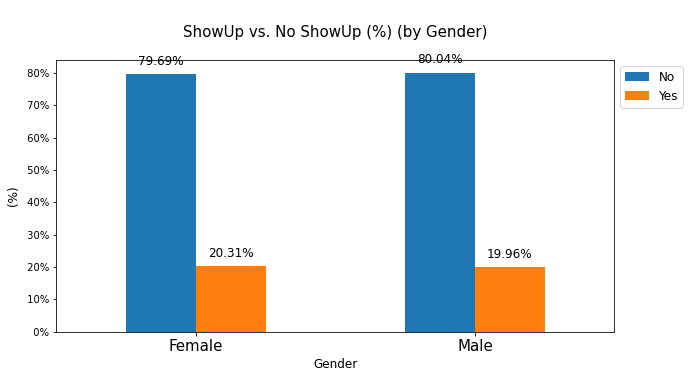

In [72]:
df_Gen = Show_No_Show_bar_plot(df, 'Gender')

In [73]:
RateVariance(df_Gen)

 Max ShowUp (%):  20.31 %
 Min ShowUp (%): 19.96 %
 Variance (%): 0.35 %


In [74]:
# Based on the initial analysis above, it is found that:
# 1. The proportion of appointments where patients are females is greater than the number of appointments where patients are males
# 2. The proportion of female patients is greater than the number of male patients.
# 3. The Show-up rate of male patients (per no. of appointments) is slightly greater than the show-up rate of female patients.

0 - 19       27.51
40 - 59      27.21
20 - 39      26.12
60 - 79      16.11
80 - 99       3.03
100 - 119     0.01
Name: Age_Group, dtype: float64

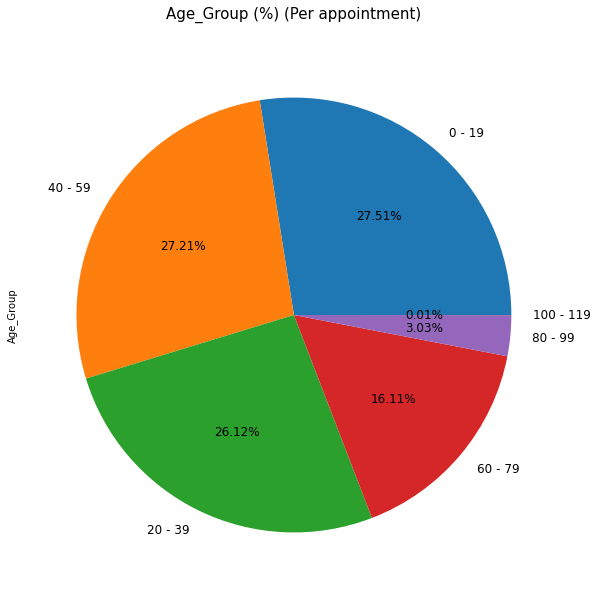

In [75]:
# 2.2: in terms of Age Groups:

PropByVar(df, 'Age_Group')

In [76]:
# The pie chart above shows that the appointment proportion where patients are from the age group 0-19 is the largest (27.51%) while the proportion of appointments where patients are from the age group 100-119 is the smallest (0.01%)

,Patient_ID
Age_Group,
0 - 19,28.89
20 - 39,25.30
40 - 59,26.25
60 - 79,16.40
80 - 99,3.16
100 - 119,0.01


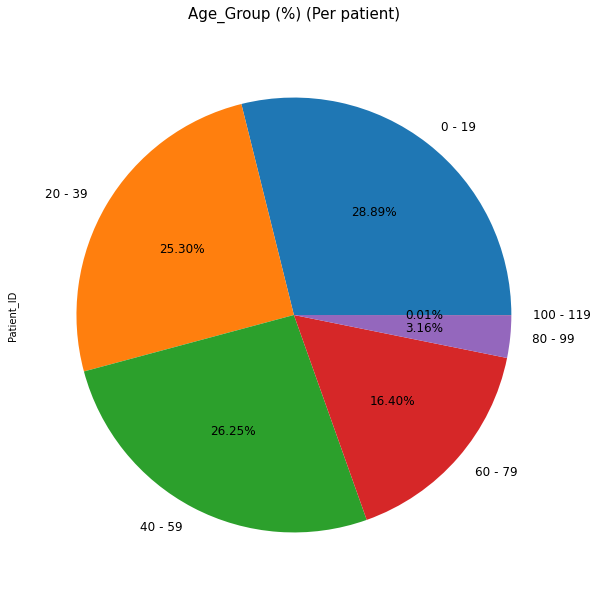

In [77]:
NumOfPatients(df, 'Age_Group')

In [78]:
# The pie chart above shows that 28.89% of patients are from the age group 0-19 while only 0.01% of the patients are from the age group 100-119. These proportion values are close to the proportion values calculated based on number of appointments.

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


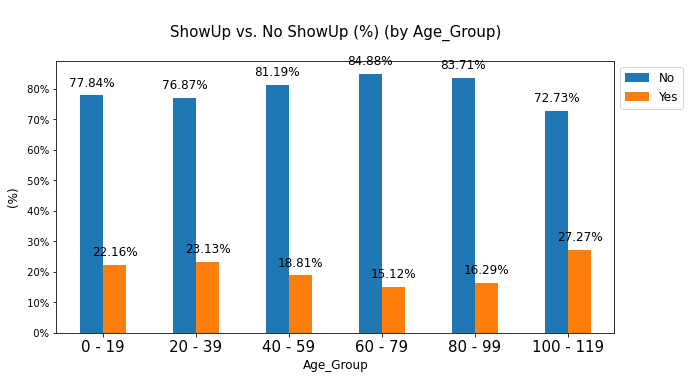

In [79]:
df_AgeGroup = Show_No_Show_bar_plot(df, 'Age_Group')

In [80]:
RateVariance(df_AgeGroup)

 Max ShowUp (%):  27.27 %
 Min ShowUp (%): 15.12 %
 Variance (%): 12.15 %


In [81]:
# Based on the initial analysis above, it is found that:
# 1. The proportion of appointments where patients are of age group 0-19 is the largest while that of age group 100-119 is the smallest.
# 2. Same applies to the number of patients.
# 3. The show-up rate of age group 60-79 (per no. of appointments) is the highest with 84.88% while the show-up rate of age group 100-119 is the lowest with 72.73%.

JARDIM CAMBURI       11.94
MARIA ORTIZ           8.98
RESISTÊNCIA           6.85
JARDIM DA PENHA       6.00
ITARARÉ               5.44
CENTRO                5.16
SANTA MARTHA          4.84
TABUAZEIRO            4.84
JESUS DE NAZARETH     4.41
BONFIM                4.29
SANTO ANTÔNIO         4.25
SANTO ANDRÉ           3.98
CARATOÍRA             3.97
JABOUR                3.88
SÃO PEDRO             3.79
ILHA DO PRÍNCIPE      3.51
NOVA PALESTINA        3.50
ANDORINHAS            3.50
DA PENHA              3.43
ROMÃO                 3.43
Name: Neighbourhood, dtype: float64

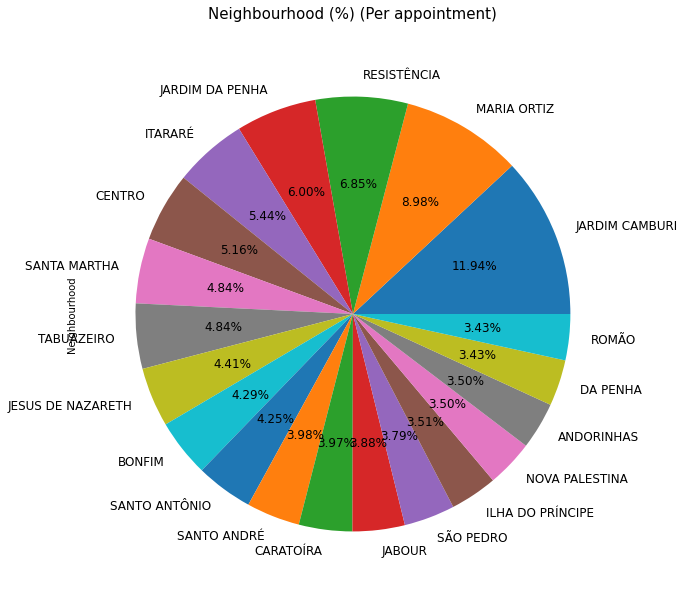

In [82]:
# In terms of Neighbourhood

PropByVar(df_top_20_Nbrhd, 'Neighbourhood')

In [83]:
# Looking at the chart above, we find that the appointment proportion where patients are based in JARDIM CAMBURI is the largest with 11.94%, where the proportion of appointments where patients are based in DA PENHA and ROMÃO is the smallest with 3.43%

,Patient_ID
Neighbourhood,
ANDORINHAS,3.12
BONFIM,4.45
CARATOÍRA,4.03
CENTRO,5.15
DA PENHA,3.62
ILHA DO PRÍNCIPE,3.03
ITARARÉ,5.89
JABOUR,3.95
JARDIM CAMBURI,11.56


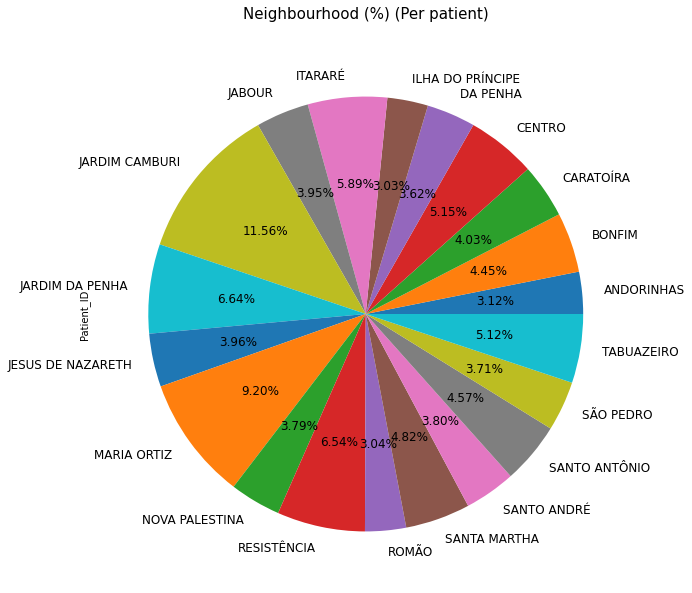

In [84]:
NumOfPatients(df_top_20_Nbrhd, 'Neighbourhood')

In [85]:
# Looking at the chart above, we find that 11.56% of the patients are based in JARDIM CAMBURI, which is close to the proportion we got when calculating the proportions (by appointments).

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


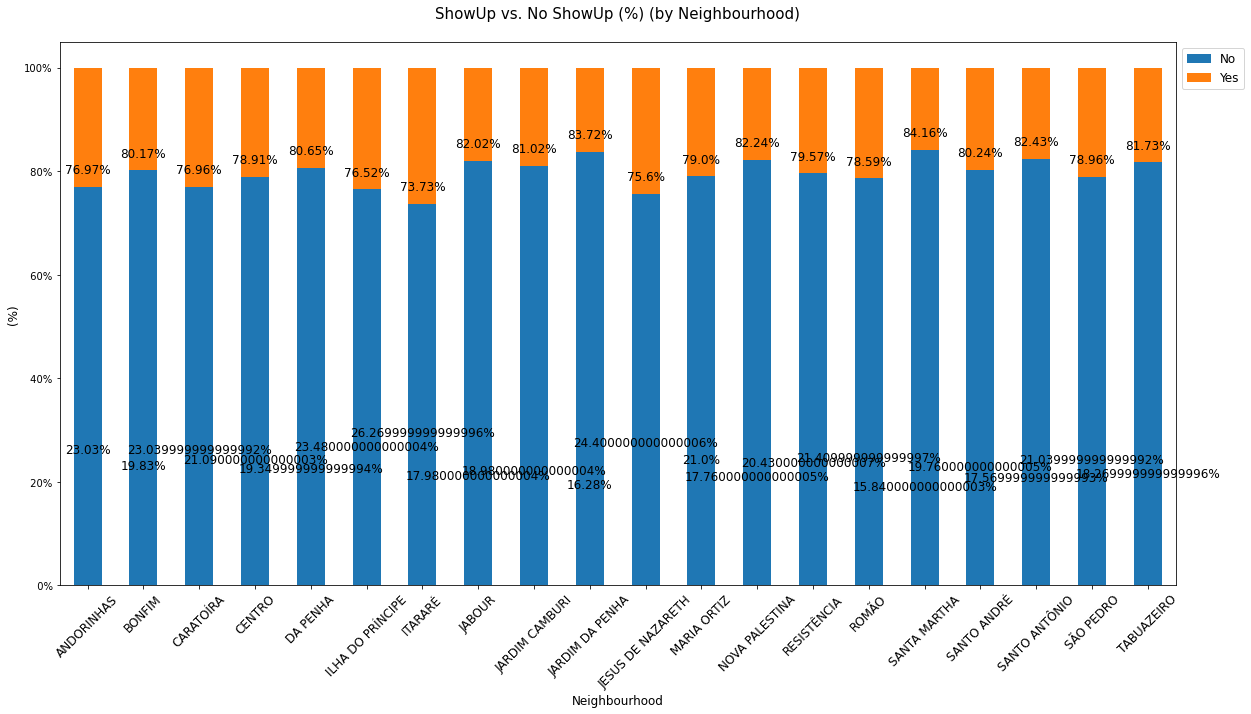

In [86]:
df_Nbrhd = Show_No_Show_bar_plot_V2(df_top_20_Nbrhd,'Neighbourhood')

In [87]:
RateVariance(df_Nbrhd)

 Max ShowUp (%):  26.27 %
 Min ShowUp (%): 15.84 %
 Variance (%): 10.43 %


In [88]:
# Based on the initial analysis above, it is found that:
# 1. The proportion of appointments where patients are based at JARDIM CAMBURI is the largest (11.94%) while that of DA PENHA and ROMÃO are the smallest (0.01%).
# 2. Same applies to the number of patients.
# 3. The show-up rate of SANTA MARTHA (per no. of appointments) is the highest (84.16%) where that of ITARARÉ is the lowest (73.73%).

No Scholarship    90.17
Scholarship        9.83
Name: Scholarship, dtype: float64

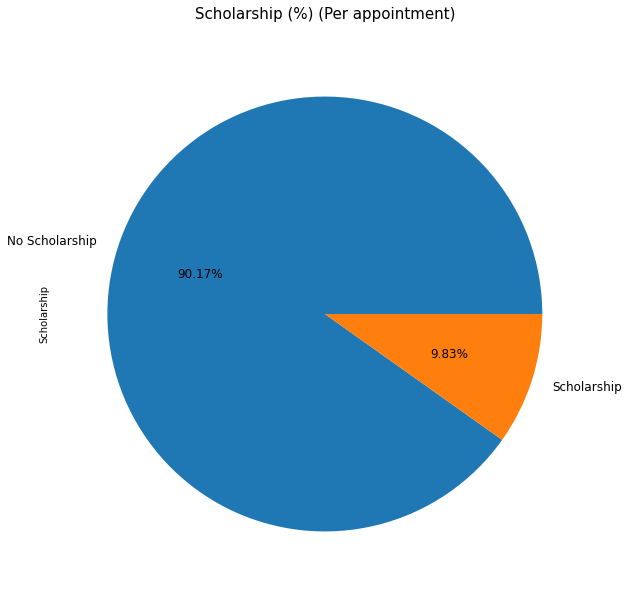

In [89]:
# 2.4: in terms of Scholarship

PropByVar(df, 'Scholarship')

In [90]:
# The pie chart above shows that the appointment proportion where patients do not have a scholarship is 90.17% while of that granted a scholarship is 9.83%.

,Patient_ID
Scholarship,
No Scholarship,90.71
Scholarship,9.29


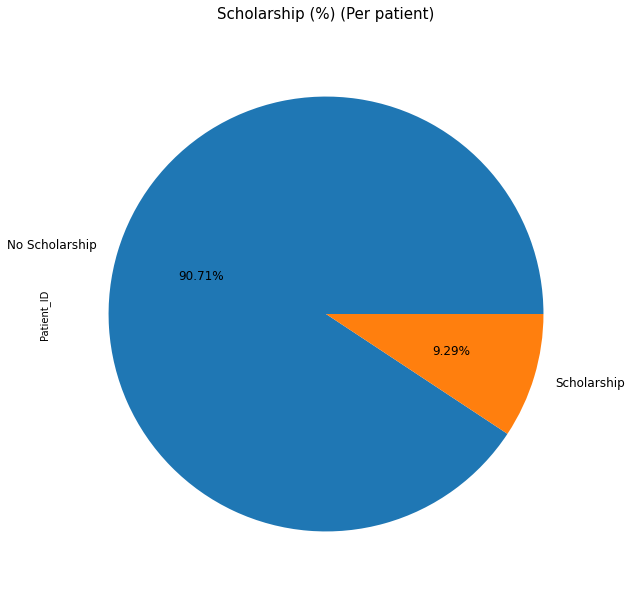

In [91]:
NumOfPatients(df, 'Scholarship')

In [92]:
# The pie chart above shows that 90.71% of the patients do not have a scholarship while 9.29% do so.

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


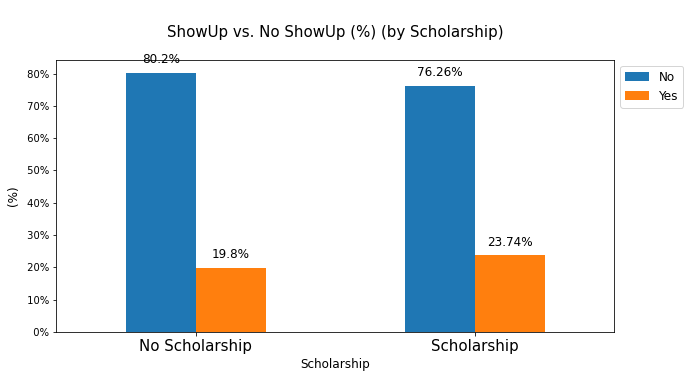

In [93]:
df_Sclrshp = Show_No_Show_bar_plot(df, 'Scholarship')

In [94]:
# The previous pie chart above shows that appointments that belong to patients with no scholarships (90.17% of total population) have the highest show-up rate (80.2%, which is higher than the average show-up rate) while that of those with scholarships (9.83% of total population) have a relatively lower show-up rate (76.26%, which is lower thant the average show-up rate)

In [95]:
RateVariance(df_Sclrshp)

 Max ShowUp (%):  23.74 %
 Min ShowUp (%): 19.8 %
 Variance (%): 3.94 %


In [96]:
# # The variance between the highest show-uprate and the lowest show-uprate ois 3.94%.

In [97]:
# Based on the initial analysis above, it is found that:
# 1. The proportion of appointments where patients do not have a scholarship is the largest (90.17%)
# 2. The proportion of patients who do not have a scholarship is the largest with (90.71%)
# 3. The show-up rate of patients who do not have a scholarship is 80.2% while that of patients who do have a scholarship is 76.26%

No Hypertension    80.27
Hypertension       19.73
Name: Hypertension, dtype: float64

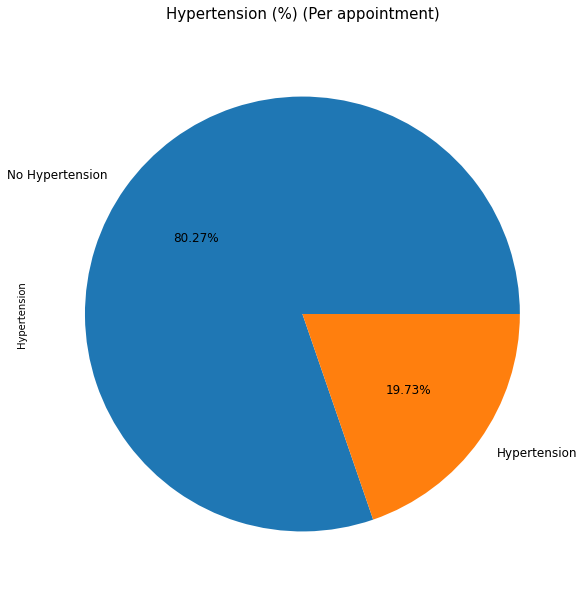

In [98]:
# 2.5: in terms of Hypertension

PropByVar(df, 'Hypertension')

In [99]:
# The pie chart above shows that the proportion of appointments where patients do not have hypertension is 80.27% while that of patients that do have hypertension is 19.73%.

,Patient_ID
Hypertension,
No Hypertension,80.35
Hypertension,19.65


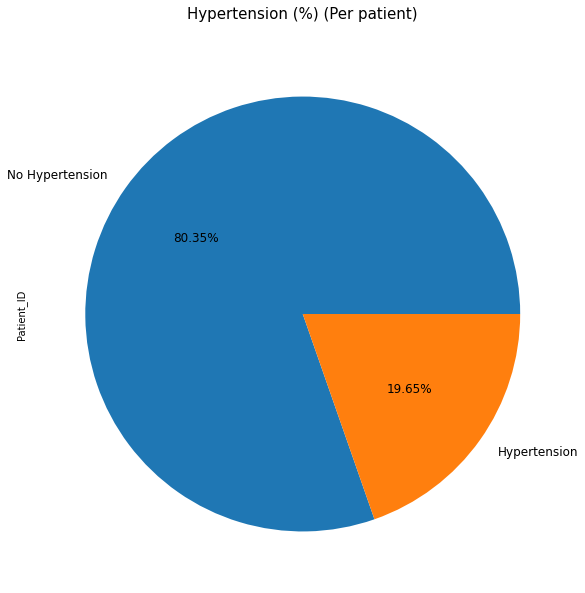

In [100]:
NumOfPatients(df, 'Hypertension')

In [101]:
# The pie chart above shows that 80.35% of patients do not have hypertension, which is close to the percentage derived from taking into account the number of appointments (80.27%).

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


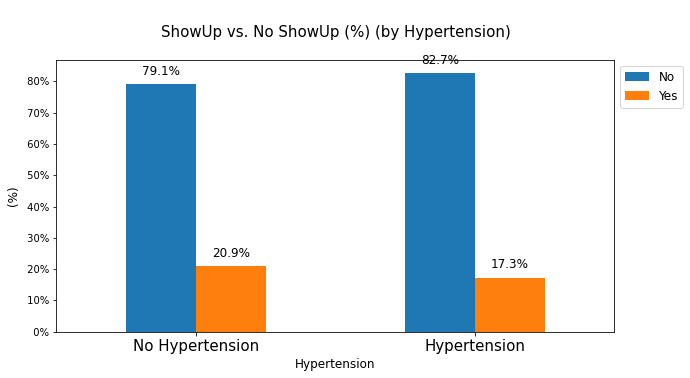

In [102]:
df_Hprtn = Show_No_Show_bar_plot(df, 'Hypertension')

In [103]:
RateVariance(df_Hprtn)

 Max ShowUp (%):  20.9 %
 Min ShowUp (%): 17.3 %
 Variance (%): 3.6 %


In [104]:
# Based on the initial analysis above, it is found that:
# 1. The proportion of appointments where patients do not have hypertension is the largest (80.27%)
# 2. The proportion of patients who do not have hypertension is the largest (80.35%)
# 3. The show-up rate of patients who do have hypertension is 82.7% while that of patients who do not have hypertension is 79.1%

No Diabetes    92.81
Diabetes        7.19
Name: Diabetes, dtype: float64

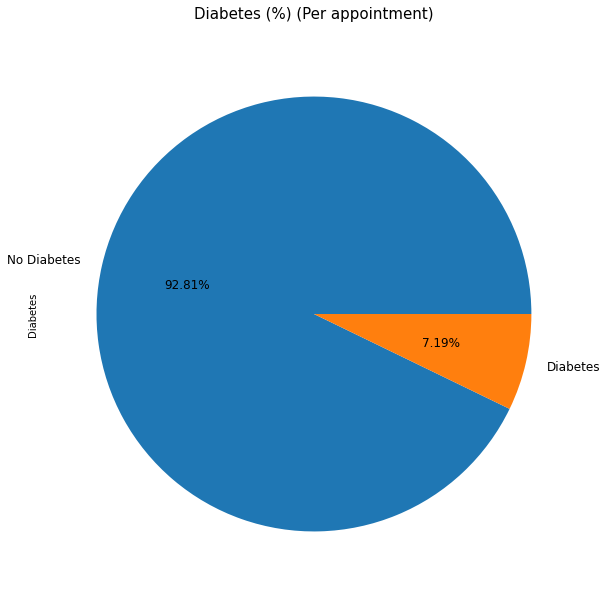

In [105]:
# 2.6: in terms of Diabetes:

PropByVar(df, 'Diabetes')

In [106]:
# The bar chart above shows that the proportion of appointments where patients do not have diabetes is 92.81% while that of patients with diabetes is 7.19%.

,Patient_ID
Diabetes,
No Diabetes,92.91
Diabetes,7.09


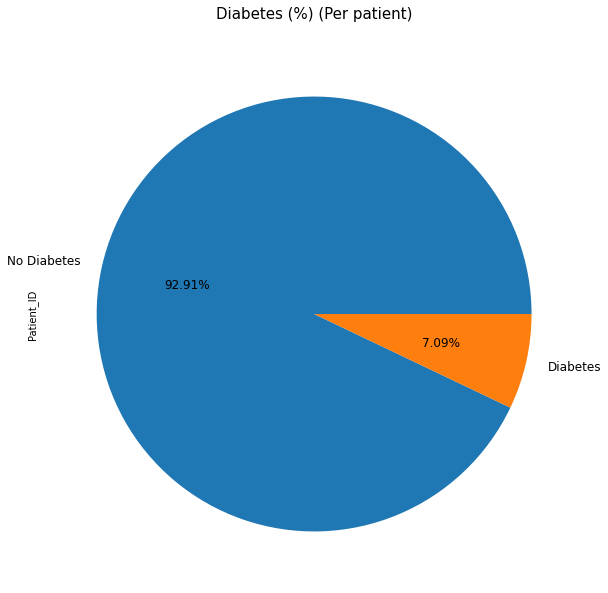

In [107]:
NumOfPatients(df, 'Diabetes')

In [108]:
# The pie chart above shows that 92.91% of patients do not have diabetes, which is a close number to that derived based on number of appointments.

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


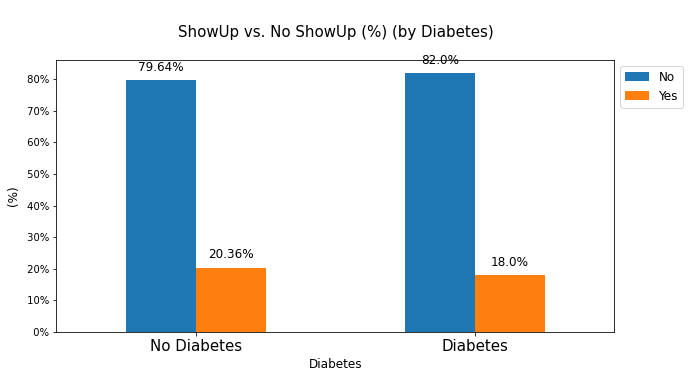

In [109]:
df_Dbt = Show_No_Show_bar_plot(df, 'Diabetes')

In [110]:
RateVariance(df_Dbt)

 Max ShowUp (%):  20.36 %
 Min ShowUp (%): 18.0 %
 Variance (%): 2.36 %


In [111]:
# Based on the initial analysis above, it is found that:
# 1. The proportion of appointments where patients do not have diabetes is the largest (92.81%)
# 2. The proportion of patients who do not have diabetes is the largest (92.91%)
# 3. The show-up rate of patients who have diabetes is 82% while that of those who do not have diabetes is 79.64%

No Alcoholism    96.96
Alcoholism        3.04
Name: Alcoholism, dtype: float64

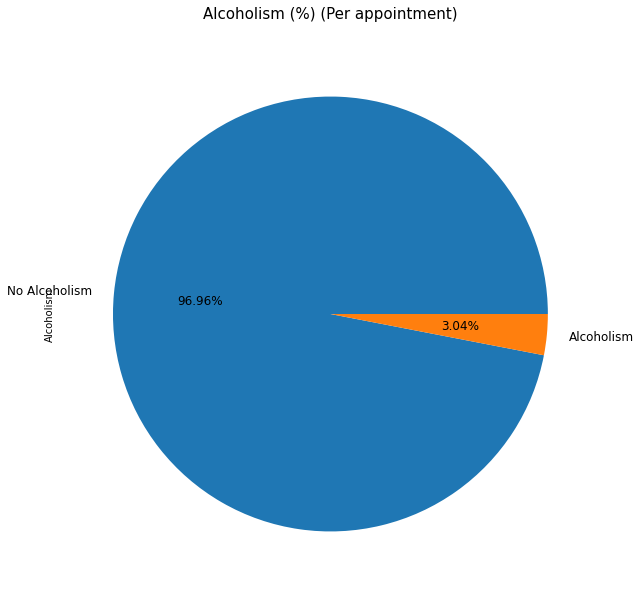

In [112]:
# 2.7: in terms of Alcoholism

PropByVar(df, 'Alcoholism')

In [113]:
# The pie chart above shows that the proportion of total appointments where patients do not have alcoholism is 96.96% while that of those who have alcoholism is 3.04%.

,Patient_ID
Alcoholism,
No Alcoholism,97.58
Alcoholism,2.42


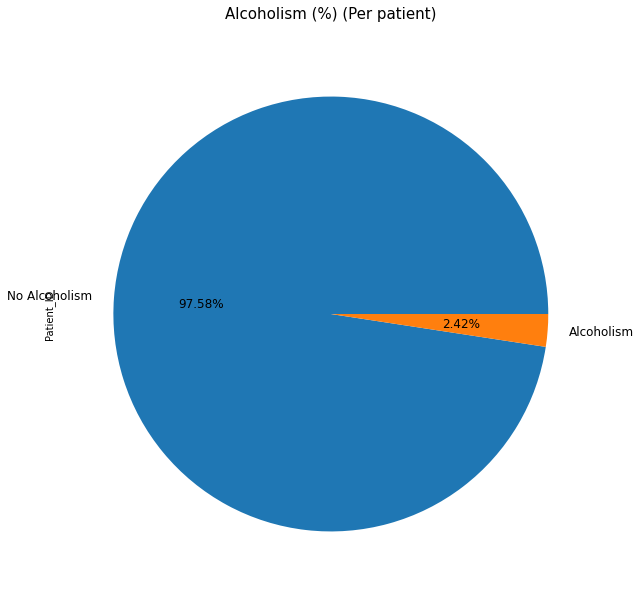

In [114]:
NumOfPatients(df, 'Alcoholism')

In [115]:
# The pie chart above shows that 97.58% of the total number of patients do not have alcoholism, which is close to the percentage derived from that of total number of appointments.

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


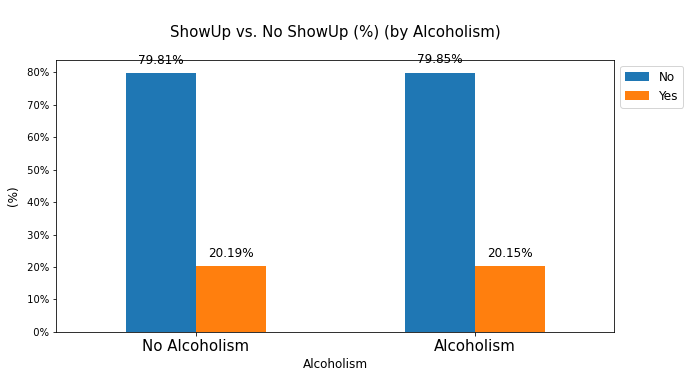

In [116]:
df_Alchl = Show_No_Show_bar_plot(df, 'Alcoholism')

In [117]:
# The bar chart above shows that patients who have alcoholism (3.04% of total population) have the highest show-up date (79.85%, which is above the average show-up rate) while patients who do not have alcoholism (96.96% of total population) have a show-up rate of 79.81% (which is equal to the average show-up rate)

In [118]:
RateVariance(df_Alchl)

 Max ShowUp (%):  20.19 %
 Min ShowUp (%): 20.15 %
 Variance (%): 0.04 %


In [119]:
# The variance between the highest show-up rate and the lowest show-up rate is 0.04%.

In [120]:

# Based on the initial analysis above, it is found that:

# The proportion of appointments where patients do not have alcoholism is the largest (96.96%)
# The proportion of patients that do not have alcoholism is the largest (97.58%)
# The show-up rate of patients who have alcoholism is the highest (79.85%) while that of those who do not have alcoholism is 79.81%.

No Handicap    97.97
Handicap L1     1.85
Handicap L2     0.17
Handicap L3     0.01
Handicap L4     0.00
Name: Handicap, dtype: float64

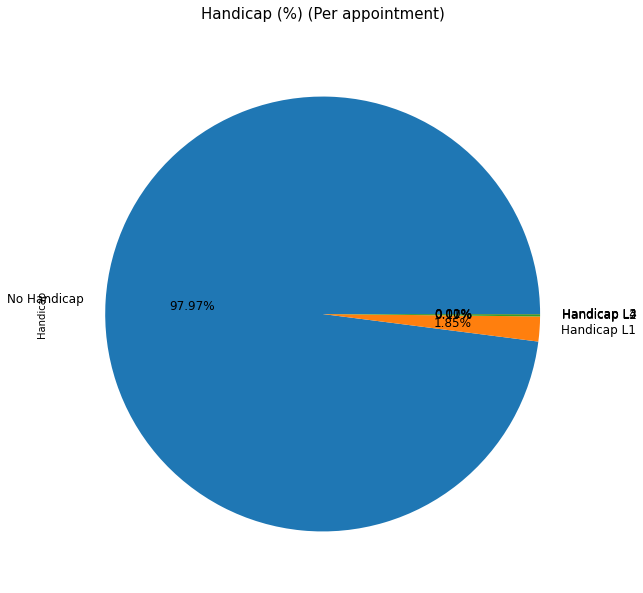

In [121]:
# 2.8: in terms of handicap level

PropByVar(df, 'Handicap')

In [122]:
# The pie chart above shows that the proportion of appointment where patients are not handicapped is 97.97% while that of those who are handicapped (Handicap L1) is 1.85%.

,Patient_ID
Handicap,
No Handicap,98.18
Handicap L1,1.65
Handicap L2,0.16
Handicap L3,0.01
Handicap L4,0.00


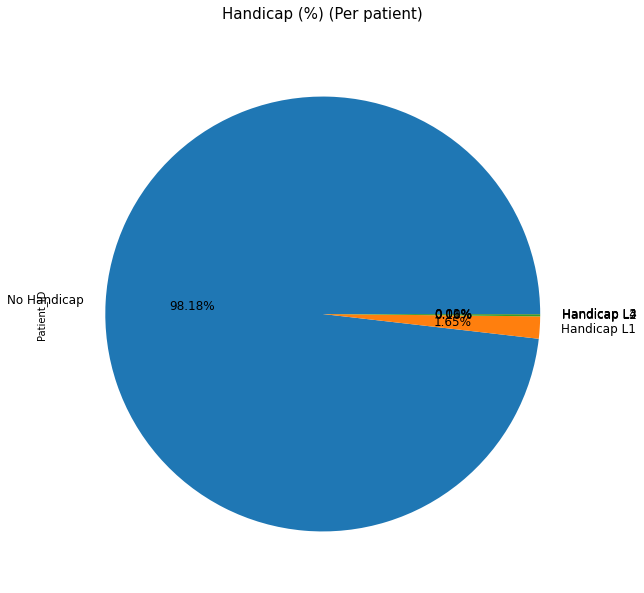

In [123]:
NumOfPatients(df, 'Handicap')

In [124]:
# The pie chart above shows that the proportion of patients who are not handicapped is 98.18%, which is a percentage close to that calculated in terms of proportion of appointment where patients are not handicapped (97.97%).

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


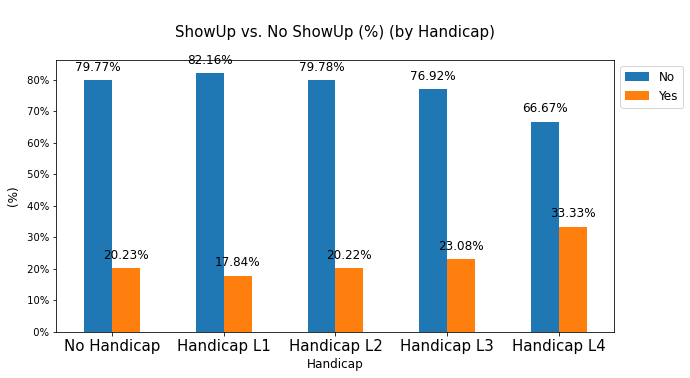

In [125]:
df_Hndcp = Show_No_Show_bar_plot(df, 'Handicap')

In [126]:
# The bar chart above shows that patients who are handicapped (handicap L1) show the highest average show-up rate of all (82.16%) while that of those who are handicapped (handicap L4) have a below-average show-up rate (66.67%).

In [127]:
RateVariance(df_Hndcp)

 Max ShowUp (%):  33.33 %
 Min ShowUp (%): 17.84 %
 Variance (%): 15.49 %


In [128]:
# The variance between the highest show-up rate and the lowest show-up rate is 15.49%.

In [129]:
# Based on the initial analysis above, it is found that:
#1. The proportion of appointments where patients are not handicapped is the largest (97.97%)
#2. The proportion of patients who are not handicapped is the largest (98.18%)
#3. The show-up rate of patients who have a "handicap L1" condition is the highest (82.16%) while that of those who have a "handicap L4" condition is the lowest (66.67%)

No SMS_received    67.9
SMS_received       32.1
Name: SMS_Received, dtype: float64

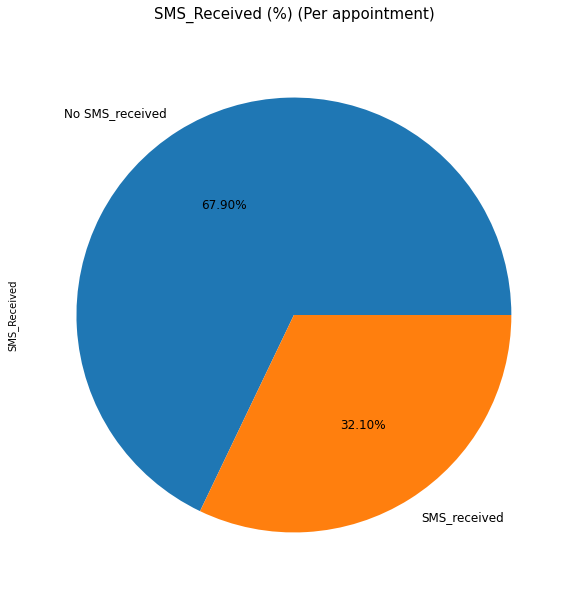

In [130]:
# 2.9: in terms of SMS_Received

PropByVar(df, 'SMS_Received')

In [131]:
# The pie chart above shows us that the proportion of appointments where patients did not receive an SMS is 67.90% while that of those who received an SMS is 32.10%.

,Patient_ID
SMS_Received,
No SMS_received,63.59
SMS_received,36.41


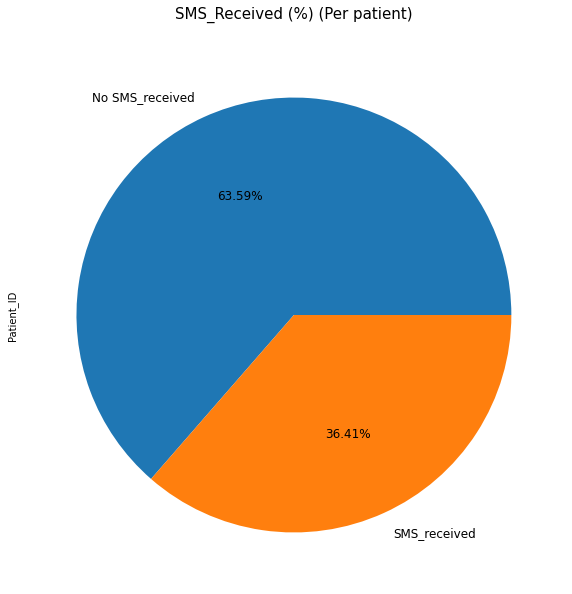

In [132]:
NumOfPatients(df, 'SMS_Received')

In [133]:
# The pie chart above shows that the proportion of patients who did not receive a SMS reminder is 36.41%, which is a percentage slightly smaller than that calculated based on the proportion of appointments where patients did not receive an SMS (69.90%).

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


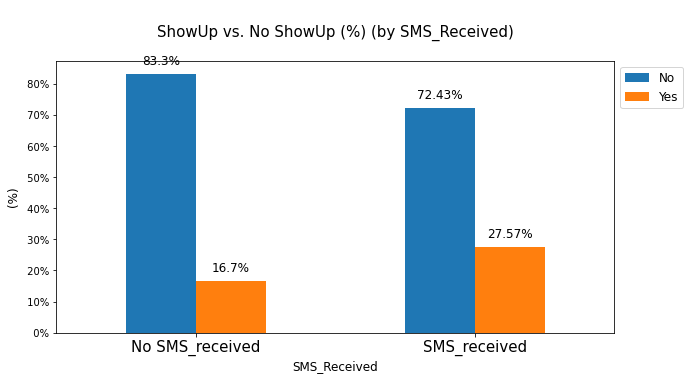

In [134]:
df_SMS = Show_No_Show_bar_plot(df, 'SMS_Received')

In [135]:
# The bar chart above shows that patients who do not have a SMS received have the highest show-up rate (83.3%), which is higher than those who did not receive a SMS message (72.43%).

In [136]:
RateVariance(df_SMS)

 Max ShowUp (%):  27.57 %
 Min ShowUp (%): 16.7 %
 Variance (%): 10.87 %


In [137]:
# The variance between the highest show-up rate and the lowest show-up rate is 10.87%.

In [138]:
# Based on the initial analysis above, it is found that:
# 1. The proportion of appointments where patients did not receive a SMS reminder is the largest (67.90%)
# 2. The proportion of patients who did not receive a SMS reminder is the largest (67.59%)
# 3. The show-up rate of patients who did not receive a SMS reminder is the highest (83.3%), while that of those who received an SMS reminder is 72.43%

Wednesday    23.40
Tuesday      23.20
Monday       20.55
Friday       17.21
Thursday     15.60
Saturday      0.04
Name: Day_Of_Week, dtype: float64

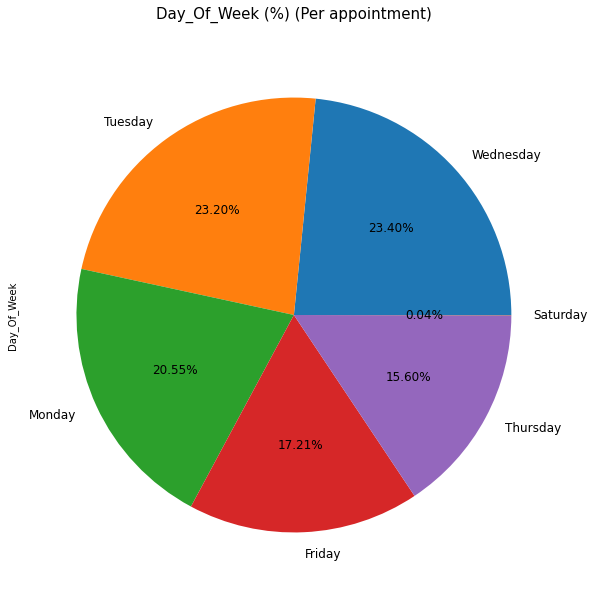

In [139]:
# 2.10: in terms of Day Of Week

PropByVar(df, 'Day_Of_Week')

In [140]:
# The pie chart above shows that tha proportion of appointments where patients were scheduled for Wednesday appointments is the highest (23.40%) while that that of those scheduled for Saturday appointments is the lowest (0.04%).

,Patient_ID
Day_Of_Week,
Monday,20.52
Tuesday,22.99
Wednesday,22.88
Thursday,16.29
Friday,17.28
Saturday,0.04


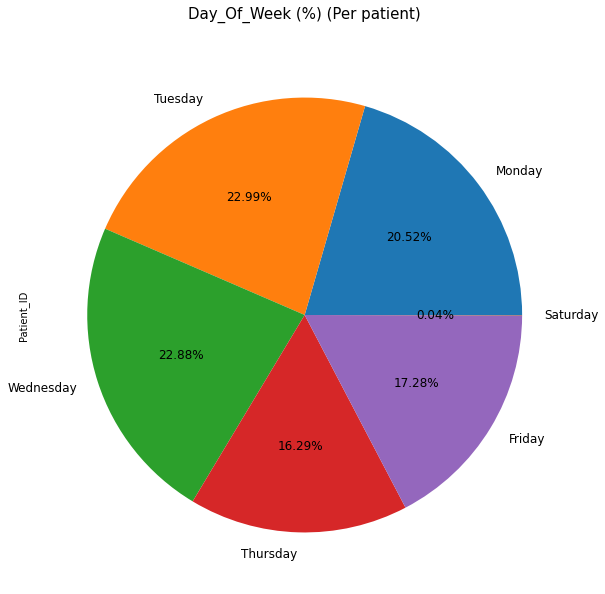

In [141]:
NumOfPatients(df, 'Day_Of_Week')

In [142]:
# The pie chart above shows that largest proportion of patients are scheduled for Tuesday appointments (22.99%), which is a percentage close to that calculated based on proportion of appointments (22.99%).

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


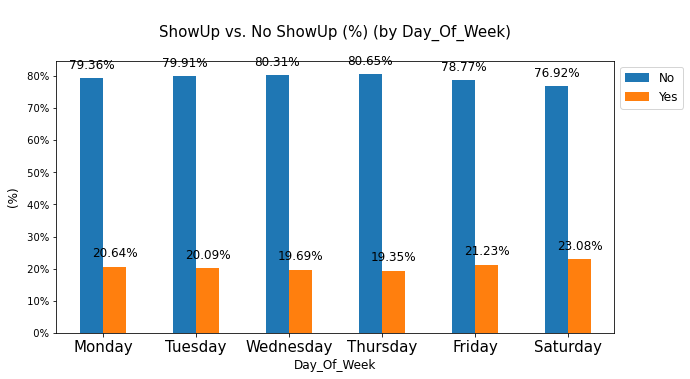

In [143]:
df_DoW = Show_No_Show_bar_plot(df, 'Day_Of_Week')

In [144]:
# The bar chart above shows that patients who have their appointments scheduled for Thursdays (15.60% of total population) have the highest show-up rate (80.65%, above average) while that of those scheduled for Saturdays (0.04% of total population) have the lowest show-up rate (76.92%, below average).

In [145]:
RateVariance(df_DoW)

 Max ShowUp (%):  23.08 %
 Min ShowUp (%): 19.35 %
 Variance (%): 3.73 %


In [146]:
# # The variance between the highest show-up rate and the lowest show-up rate is 3.73%.

In [147]:
# Based on the initial analysis above, it is found that:
# 1. The proportion of appointments where patients were scheduled for Wednesdays is the largest (23.40%)
# 2. The proportion of patients who were scheduled for Tuesdays is the largest (22.99%)
# 3. The show-up rate of patients who were scheduled for Thursdays is the highest (80.65%) while that of those scheduled for Saturdays is the lowest (76.92%)

0 - 29       89.97
30 - 59       8.07
60 - 89       1.71
90 - 119      0.17
150 - 179     0.05
120 - 149     0.03
Name: Waiting_Duration_Groups, dtype: float64

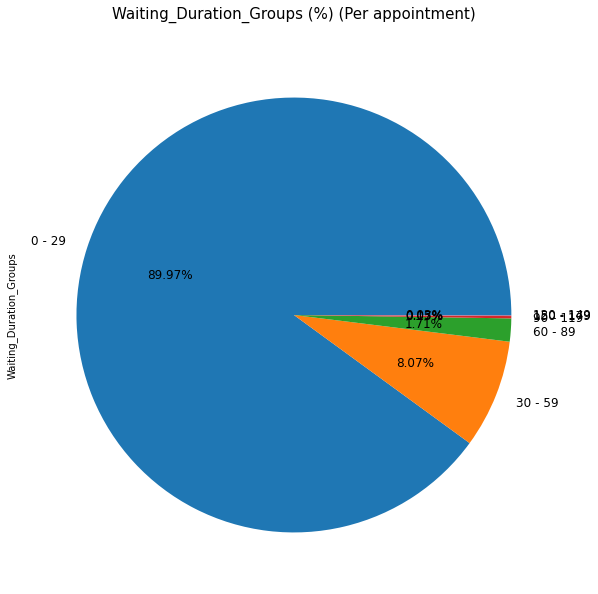

In [148]:
# 2.10: in terms of Waiting Duration

PropByVar(df, 'Waiting_Duration_Groups')

In [149]:
# The pie chart above shows that the proportion of appointments where patients have a waiting duration of "0 - 29" days is the largest (89.97%) while that of those who have a waiting duration of "120 - 149" days is 0.03%.

,Patient_ID
Waiting_Duration_Groups,
0 - 29,85.10
30 - 59,11.89
60 - 89,2.61
90 - 119,0.28
120 - 149,0.04
150 - 179,0.08


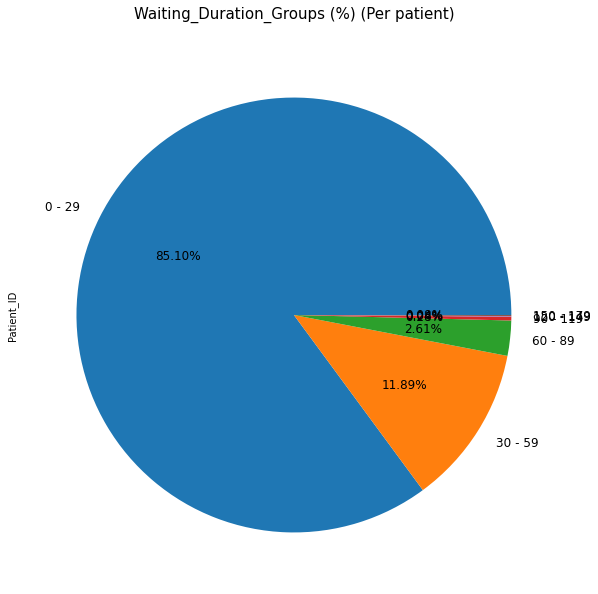

In [150]:
NumOfPatients(df, 'Waiting_Duration_Groups')

In [151]:
# The pie chart above shows that 85.10% of patients have a duration during of "0 - 29" days, which is a percentage slightly different from that calculated based on the proportion of appointments (89.97%).

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


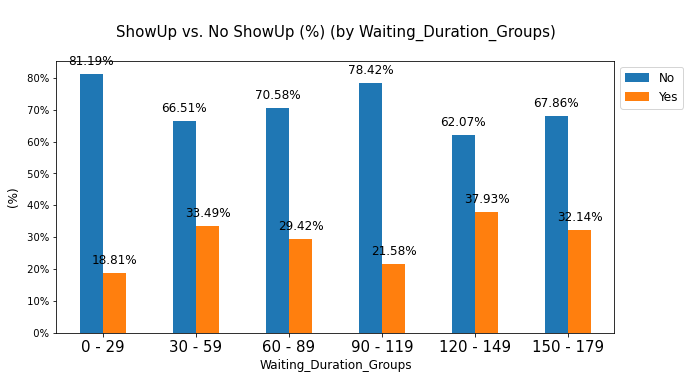

In [152]:
df_WtngDur = Show_No_Show_bar_plot(df, 'Waiting_Duration_Groups')

In [153]:
# The bar chart above shows that for patients with a waiting duration of "0 -29" days (89.97% of total population) have the highest show-up rate (81.19%, above average) while that of those with waiting duration of "120 - 149" days (0.03% of total population) is the lowest (62.07%, below average).

In [154]:
RateVariance(df_WtngDur)

 Max ShowUp (%):  37.93 %
 Min ShowUp (%): 18.81 %
 Variance (%): 19.12 %


In [155]:
# The variance between the highest rate and the lowest rate is 19.12%.

In [156]:
# Based on the initial analysis above, it is found that:
# 1. The proportion of appointments where patients had a waiting duration of "0 - 29" days is the largest (89.97%)
# 2. The proportion of patients with a waiting duration of "0 - 29" days is the largest (85.10%)
# 3. The show-up rate of patients with a waiting duration of "0 - 29" days is the highest (81.19%) while that of those with a waiting duration of "120 - 149" days is the lowest (62.07%)

### Research Question 3: Given the appointments where patients didn't show up, what is percentage of recurring patients vs. new patients?
1. "Recurring patients" are patients who booked more than one appointment and did not show up more than once.
2. "New patients" are patients who did not show up for appointments only for once.

In [157]:
new_patient = np.round(No_Show_df['Patient_ID'].nunique() / No_Show_df['Appointment_ID'].nunique()*100,2)
rec_patient = 100 - new_patient
print('New clients(%): ' + str(new_patient) + '%\n' + 'Recurring clients(%): ' + str(rec_patient) + '%')

New clients(%): 79.15%
Recurring clients(%): 20.849999999999994%


In [158]:
# The pie chart above shows that the percentage of new patients is 79.55% while that of recurring patients is 20.85%.

### Research Question 4: For each pair of variables, calculate the proportions of category combinations to identify the largest group of patients who didn't show-up. (Limit your analysis to 3 variables)

In [159]:
# 4.1 - Gender

In [160]:
# 4.1.1 NoShowUp (%) (per Gender per Scholarship)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Scholarship,No Scholarship,Scholarship
Gender,,
Female,85.57,14.43
Male,93.89,6.11


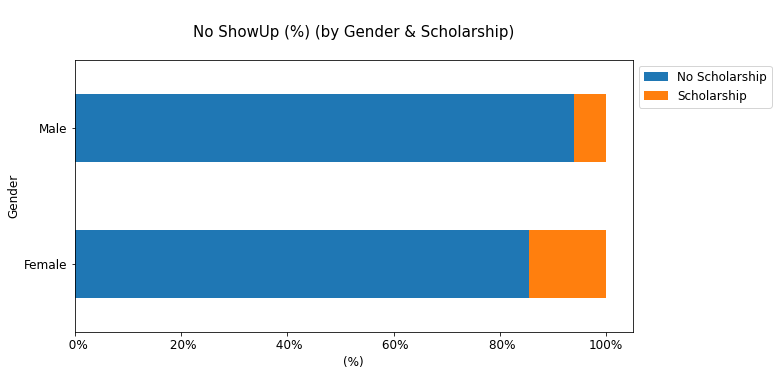

In [161]:
NoShowBy2Vars(No_Show_df,'Gender', 'Scholarship')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Scholarship,No Scholarship,Scholarship
Gender,,
Female,20.48,25.07
Male,19.76,28.60


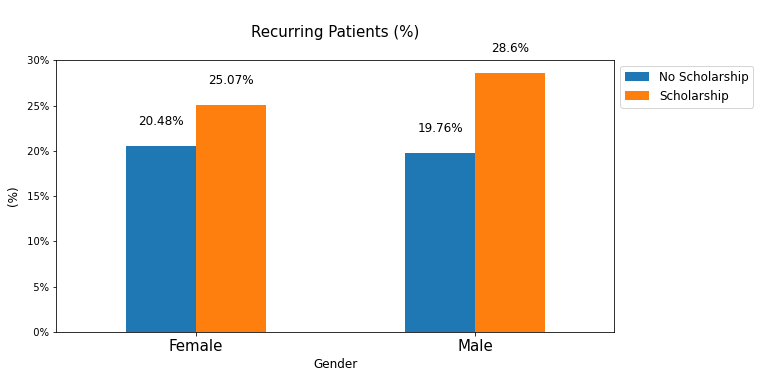

In [162]:
Recurring_Patient_prct(No_Show_df,'Gender','Scholarship')

In [163]:
# Looking at the No ShowUp (%)chart above, it is found that:

# 1. 14.43% of the no-show appointments belong to patients who are females that have a scholarship;
# 2. 6.11% of the no-show appointments belong to patients who are males that have a scholarship

# Looking at the *Recurring patients (%)* chart above, it is found that:

# 1. For patients who are female, the proportion of recurring patients with a scholarship (25.07%) is greater than that of those without a scholarship;
# 2. For patients who are male, the proportion of recurring patients with a scholarship (28.6%) is greater than that of those without a scholarship (19.76%)

# "Recurring patient" = a patient who has booked more than one appointment and did not show up for more than one appointment

In [164]:
# Q4.1.2 NoShowUp (%) ( per Gender per Hypertension)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Hypertension,No Hypertension,Hypertension
Gender,,
Female,81.79,18.21
Male,85.56,14.44


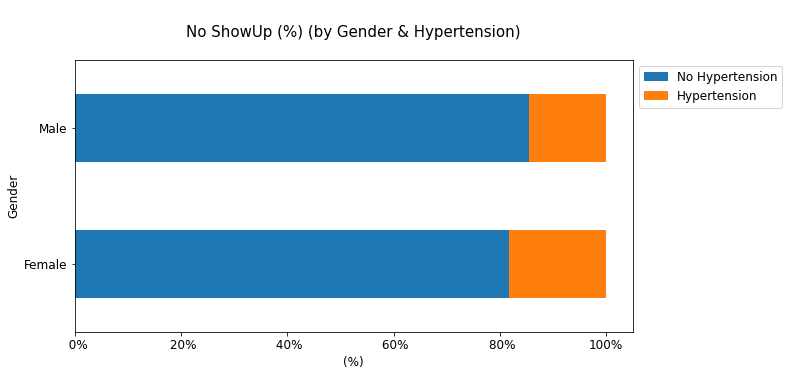

In [165]:
NoShowBy2Vars(No_Show_df,'Gender' ,'Hypertension')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Hypertension,No Hypertension,Hypertension
Gender,,
Female,21.31,20.40
Male,20.54,18.92


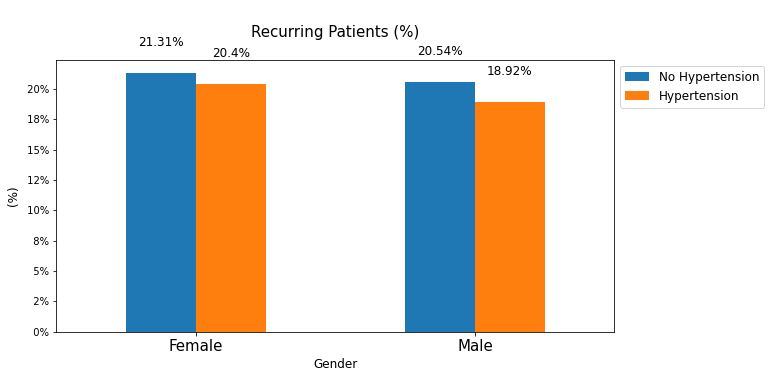

In [166]:
Recurring_Patient_prct(No_Show_df,'Gender','Hypertension')

In [167]:
# It is shown from the No ShowUp (%) chart that:

# Female patients who have hypertension account for 18.21% of the no-show appointments
# Male patients who have hypertension account for 14.44% of the no-show appointments

# It is shown from the Recurring patients (%) chart that:

# For female patients, the proportion of recurring patients with no hypertension (21.31%) is greater than those who have hypertension (20.4%)
# For male patients, the proportion of recurring patients with no hypertension (20.54%) is greater than those with hypertension (18.92%)


In [168]:
# Q4.1.3 NoShowUp (%) (per Gender per Diabetes)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Diabetes,No Diabetes,Diabetes
Gender,,
Female,93.03,6.97
Male,94.65,5.35


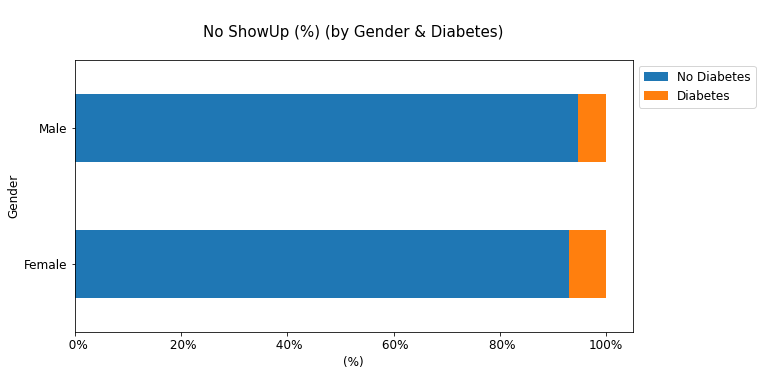

In [169]:
NoShowBy2Vars(No_Show_df,'Gender' ,'Diabetes')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Diabetes,No Diabetes,Diabetes
Gender,,
Female,21.10,21.73
Male,20.64,14.29


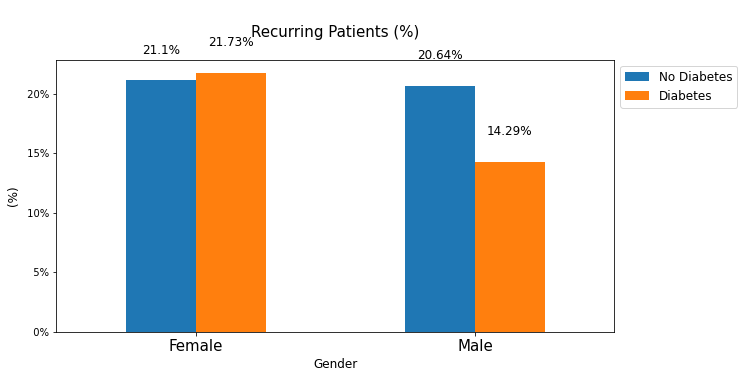

In [170]:
Recurring_Patient_prct(No_Show_df,'Gender','Diabetes')

In [171]:
# It is shown from the No ShowUp (%) chart that:

# Female patients with diabetes account for 6.97% of the total number of no-show appointments
# Male patients with diabetes account for 5.35% of the total number of no-show appointments


# It is shown from the Recurring patients (%) chart that:

# For female patients, the proportion of recurring patients with diabetes (21.73%) is greater than that ot those without diabetes (21.1%)
# For male patients, the proportion of recurring patients without diabetes (20.6%) is greater than that of those with diabetes (14.29%)

In [172]:
# Q4.1.4 NoShowUp (%) (per Gender per Alcoholism)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Alcoholism,No Alcoholism,Alcoholism
Gender,,
Female,97.89,2.11
Male,95.22,4.78


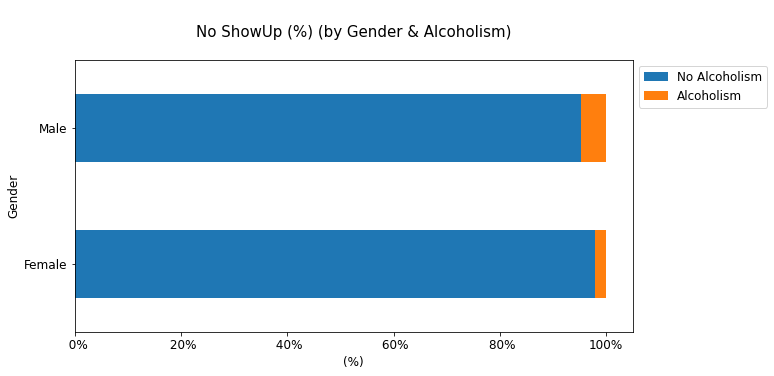

In [173]:
NoShowBy2Vars(No_Show_df,'Gender' ,'Alcoholism')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Alcoholism,No Alcoholism,Alcoholism
Gender,,
Female,21.08,24.03
Male,20.19,22.49


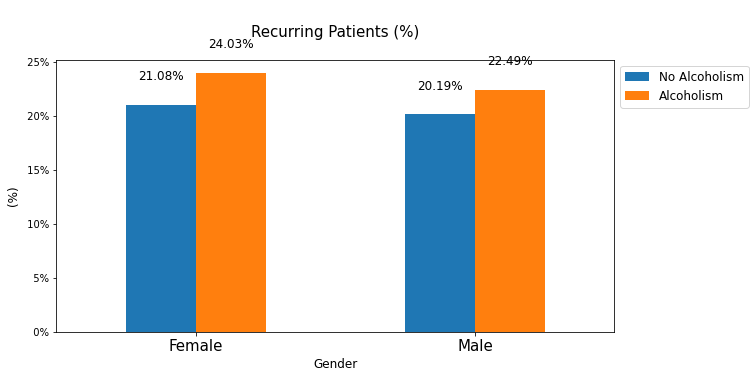

In [174]:
Recurring_Patient_prct(No_Show_df,'Gender','Alcoholism')

In [175]:
# It is shown from the No ShowUp (%) chart that:

# Female patients with alcoholism account for 2.11% of the total number of no-show appointments
# Male patients with alcoholism account for 4.78% of the total number of no-show appointments

# It is shown from the Recurring patients (%) chart that:

# For female patients, the proportion of recurring patients with alcoholism (24.03%) is greater than that of those without alcoholism (21.08%)
# For male patients, the proportion of recurring patients with alcoholism (22.49%) is greater that that of those without alcoholism (20.19%)

In [176]:
# Q4.1.5 NoShowUp (%) ( per Gender per Handicap)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Handicap,No Handicap,Handicap L1,Handicap L2,Handicap L3,Handicap L4
Gender,,,,,
Female,98.34,1.48,0.17,0.00,0.01
Male,97.89,1.92,0.16,0.04,0.00


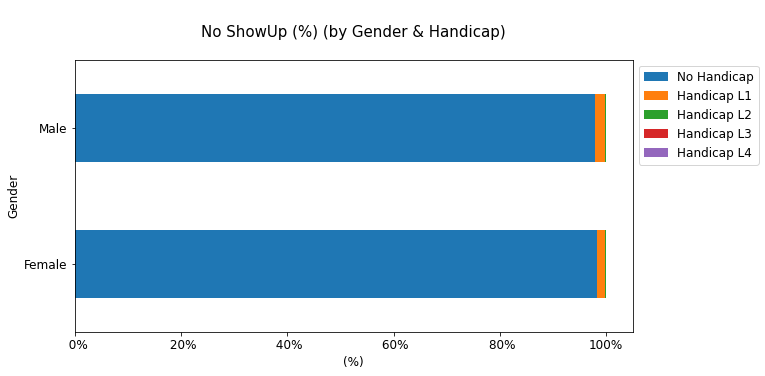

In [177]:
NoShowBy2Vars(No_Show_df,'Gender' ,'Handicap')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Handicap,No Handicap,Handicap L1,Handicap L2,Handicap L3,Handicap L4
Gender,,,,,
Female,20.94,33.33,36.00,NaN,0.0
Male,20.12,31.08,8.33,0.0,NaN


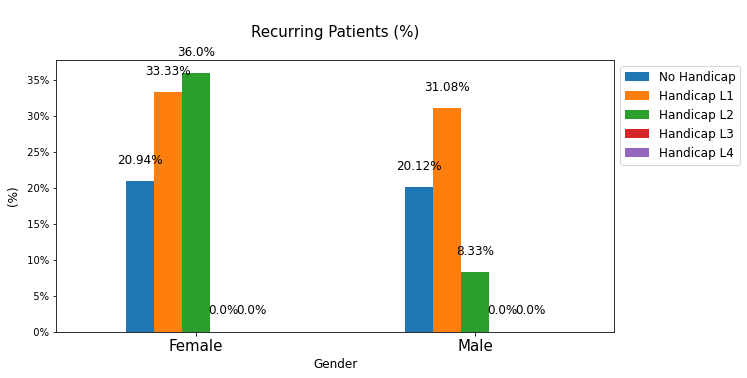

In [178]:
Recurring_Patient_prct(No_Show_df,'Gender','Handicap')

In [179]:
# The No ShowUp (%) chart shows us that:

# Female patients who are not handicapped account for 98.34% of the total number of no-show appointments
# Male patients who are not handicapped account for 97.89% of the total number of no-show appointments

# The Recurring patients (%) chart shows us that:

# For female patients, the proportion of patients with Handicap L2 condition (36.0%) accounts for the largest percentage of recurring patients
# For male patients. the proportion of patients with Handicap L1 condition (31.08%) account for the largest percentage of recurring patients

In [180]:
# Q4.1.6 NoShowUp (%) ( per Gender per SMS_received)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


SMS_Received,No SMS_received,SMS_received
Gender,,
Female,53.94,46.06
Male,60.33,39.67


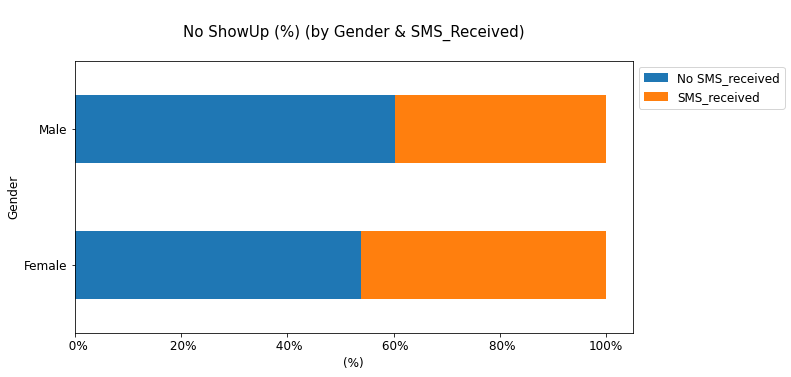

In [181]:
NoShowBy2Vars(No_Show_df,'Gender' ,'SMS_Received')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


SMS_Received,No SMS_received,SMS_received
Gender,,
Female,15.68,11.03
Male,18.24,8.32


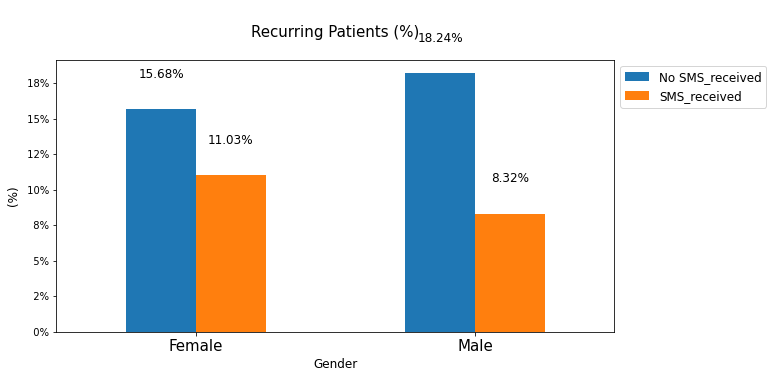

In [182]:
Recurring_Patient_prct(No_Show_df,'Gender','SMS_Received')

In [183]:
# The No ShowUp (%) chart shows us that:

# Female patients who did not receive an SMS reminder account for 53.95% of the total number of no-show appointments
# Male patients who did not receive an SMS reminder account for 60.33% of the total number of now-show appointments

# The Recurring patients (%) chart shows us that:

# For female patients, the proportion of patients who did not receive an SMS message account for the largest percentage (15.68%) of recurring patients
# For male patients, the proportion of patients who did not receive an SMS message account for the largest percentage (18.24%) of recurring patients

In [184]:
# Q4.1.7 NoShowUp (%) (per Gender per Day_Of_Week)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Day_Of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Gender,,,,,,
Female,21.25,23.45,22.60,14.75,17.90,0.05
Male,20.56,22.39,23.23,15.34,18.45,0.03


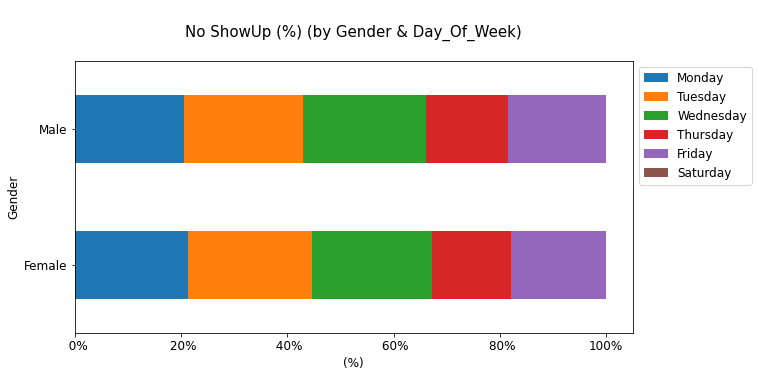

In [185]:
NoShowBy2Vars(No_Show_df,'Gender' ,'Day_Of_Week')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Day_Of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Gender,,,,,,
Female,10.77,11.37,11.34,6.88,9.84,0.0
Male,9.45,13.19,13.82,9.79,13.05,0.0


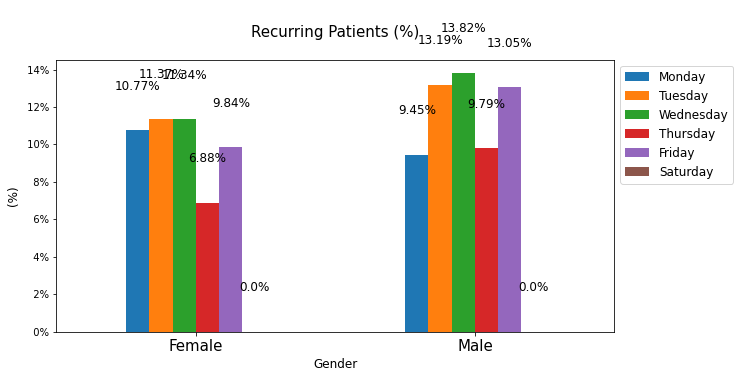

In [186]:
Recurring_Patient_prct(No_Show_df,'Gender','Day_Of_Week')

In [187]:
# The No ShowUp (%) chart shows us that:

# Female patients scheduled to show up on Tuesdays account for 23.45% of the total number of no-show appointments
# Male patients scheduled to show up on Wednesdays account for 23.23% of the total number of no-show appointments

# The Recurring patients (%) chart shows us that:

# For female patients, the recurring patients that were scheduled for Tuesdays appointments account for the greatest percentage (11.37%)
# For male patients, the recurring patients that were scheduled for Wednesday appointments account for the greatest percentage (13.82%)

In [188]:
# Q4.1.8 NoShowUp (%) (per Gender per Age Group)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Age_Group,0 - 19,20 - 39,40 - 59,60 - 79,80 - 99,100 - 119
Gender,,,,,,
Female,24.60,33.23,26.82,12.82,2.50,0.02
Male,40.79,23.68,22.56,10.63,2.34,0.00


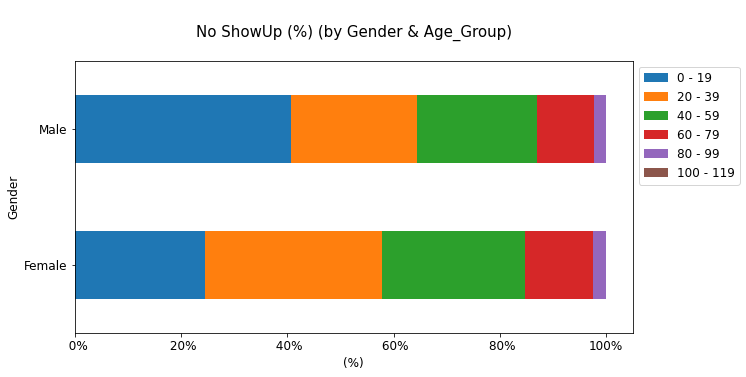

In [189]:
NoShowBy2Vars(No_Show_df,'Gender' ,'Age_Group')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Age_Group,0 - 19,20 - 39,40 - 59,60 - 79,80 - 99,100 - 119
Gender,,,,,,
Female,20.09,21.80,22.1,19.45,19.73,66.67
Male,22.25,21.16,17.8,16.20,19.34,NaN


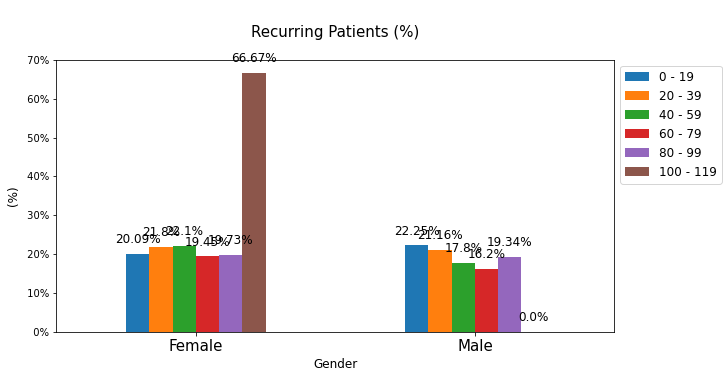

In [190]:
Recurring_Patient_prct(No_Show_df,'Gender','Age_Group')

In [191]:
# The No ShowUp (%) chart shows us that:

# Female patients that belong to the age group 20-39 years old account for 33.23% of the total number of no-show appointments
# Male patients that belong to the age group 0-19 years old account for 40.19% of the total number of no-show appointments

# The Recurring patients (%) chart shows us that:

# For female patients, the patients belonging to age group 100-119 years old account for the greatest percentage (66.67%)
# For male patients, the patients belonging to age group 0-19 years old account for the greatest percentage (22.25%)

In [192]:
# Q4.1.9 NoShowUp (%) (per Gender per neighbourhood)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Neighbourhood,ANDORINHAS,BONFIM,CARATOÍRA,CENTRO,DA PENHA,ILHA DO PRÍNCIPE,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,MARIA ORTIZ,NOVA PALESTINA,RESISTÊNCIA,ROMÃO,SANTA MARTHA,SANTO ANDRÉ,SANTO ANTÔNIO,SÃO PEDRO,TABUAZEIRO
Gender,,,,,,,,,,,,,,,,,,,,
Female,4.02,4.39,4.44,4.63,3.52,4.03,7.03,3.84,11.61,4.82,5.15,9.25,3.05,6.64,3.67,3.9,4.34,3.56,3.80,4.32
Male,3.93,3.86,4.69,6.81,2.84,4.15,7.13,2.70,10.45,4.85,5.67,9.49,3.13,7.48,3.55,3.6,3.02,3.93,4.22,4.49


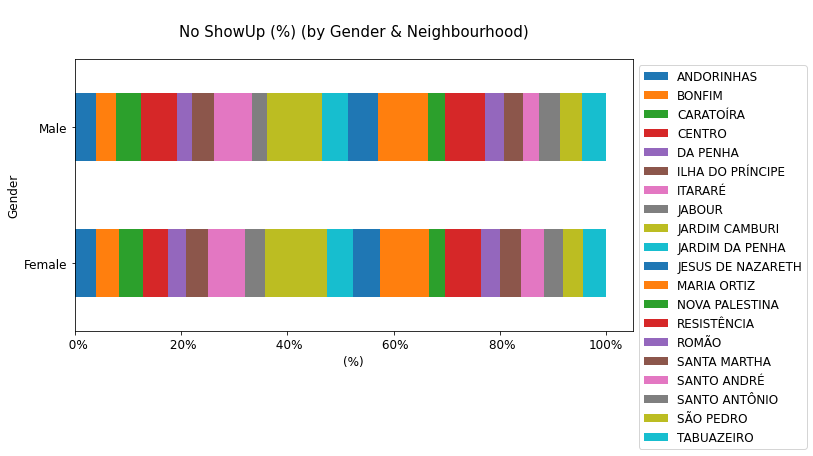

In [193]:
NoShowBy2Vars(df_top_20_Nbrhd_NoShow,'Gender' ,'Neighbourhood')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Neighbourhood,ANDORINHAS,BONFIM,CARATOÍRA,CENTRO,DA PENHA,ILHA DO PRÍNCIPE,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,MARIA ORTIZ,NOVA PALESTINA,RESISTÊNCIA,ROMÃO,SANTA MARTHA,SANTO ANDRÉ,SANTO ANTÔNIO,SÃO PEDRO,TABUAZEIRO
Gender,,,,,,,,,,,,,,,,,,,,
Female,29.57,18.04,18.11,20.1,21.19,30.06,23.51,16.06,22.57,14.73,24.43,19.77,17.18,24.04,25.71,18.51,35.12,16.01,24.54,17.79
Male,28.41,17.92,20.48,22.3,14.96,28.49,17.55,8.26,22.65,15.67,20.47,14.59,22.14,25.97,22.01,18.63,21.48,23.86,14.81,20.90


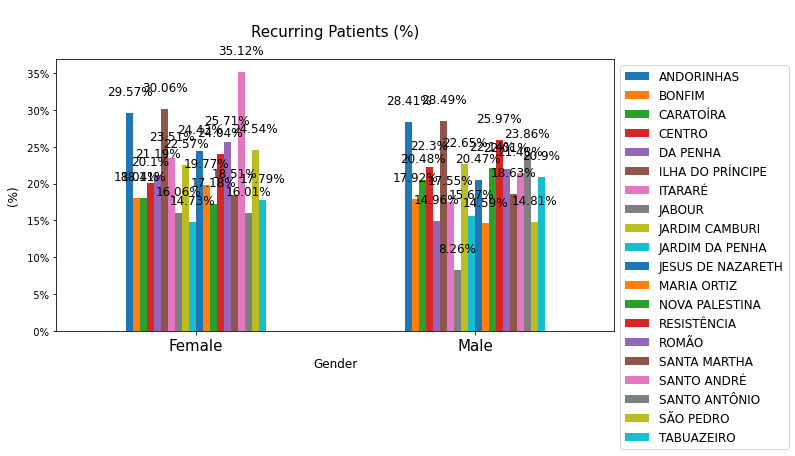

In [194]:
Recurring_Patient_prct(df_top_20_Nbrhd_NoShow,'Gender' ,'Neighbourhood')

In [195]:
# The No ShowUp (%) chart shows us that:

# For female patients, patients from Jardim Camburi account for 11.61% of the no-show appointments
# For male patients, patients from Jardim Chamburi account for 10.45% fo the now-show appointments

# The Recurring patients (%) chart shows us that:

# Female patients from SANTO ANDRÉ account for the greatest percentage of recurring patients (35.12%)
# Male patients from SANTO ANDRÉ account for the greatest percentage of recurring patients (28.49%)

In [196]:
# Q4.1.10 NoShowUp (%) (per Gender per Waiting duration group)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Waiting_Duration_Groups,0 - 29,30 - 59,60 - 89,90 - 119,120 - 149,150 - 179
Gender,,,,,,
Female,84.05,12.98,2.62,0.23,0.05,0.07
Male,83.36,14.13,2.25,0.10,0.05,0.10


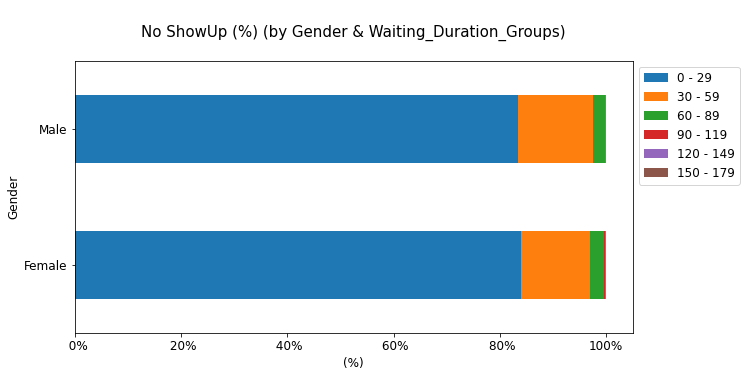

In [197]:
NoShowBy2Vars(No_Show_df,'Gender' ,'Waiting_Duration_Groups')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Waiting_Duration_Groups,0 - 29,30 - 59,60 - 89,90 - 119,120 - 149,150 - 179
Gender,,,,,,
Female,20.26,9.35,6.01,0.0,0.0,0.0
Male,20.33,7.88,10.34,0.0,0.0,12.5


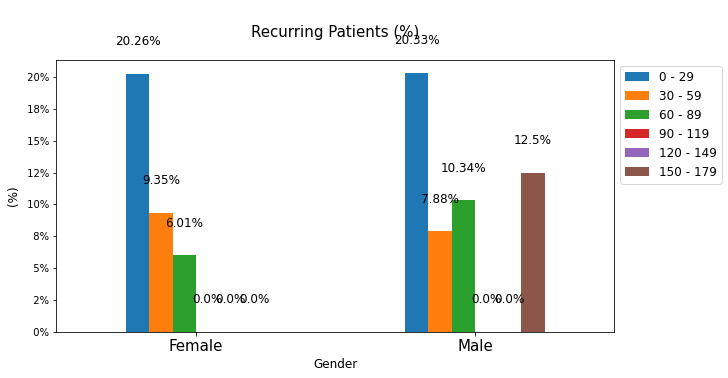

In [198]:
Recurring_Patient_prct(No_Show_df,'Gender' ,'Waiting_Duration_Groups')

In [199]:
# The No ShowUp (%) chart shows us that:

# For female patients, the patients who have a waiting duration of 0-29 days account for 84.05% of no-show appointments
# For male patients, the patients who have a waiting duration of 0-29 days account for 83.36% of no-show appointments

# The Recurring patients (%0 chart shows us that:

# Female patients who have waiting duration of 0-29 days account for the greatest percentage of no-show appointments (20.26%)
# Male patients who have a waiting duration of 0-29 days account for the greatest percentage of no-show appointments (20.33%)

In [200]:
# 4.2 Age Groups

In [201]:
# Q4.2.1 NoShowUp (%) ( per Age Group per Gender)

In [202]:
    # Addressed in Q4.1.8

In [203]:
# Q4.2.2 NoShowUp (%) (per Age Group per Scholarship)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Scholarship,No Scholarship,Scholarship
Age_Group,,
0 - 19,87.55,12.45
20 - 39,84.77,15.23
40 - 59,88.90,11.10
60 - 79,96.55,3.45
80 - 99,99.82,0.18
100 - 119,100.00,0.00


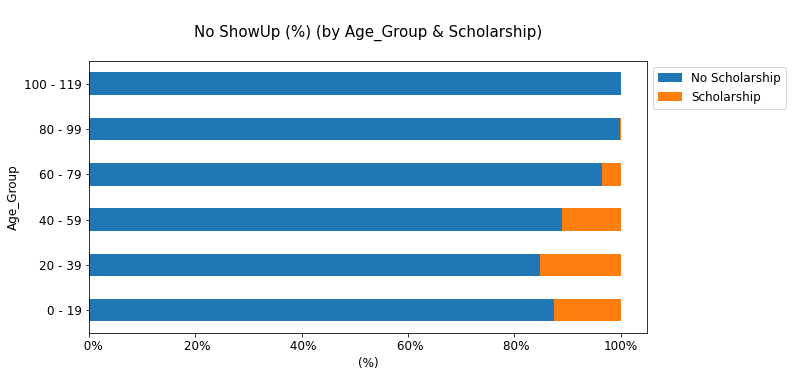

In [204]:
NoShowBy2Vars(No_Show_df,'Age_Group' ,'Scholarship')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Scholarship,No Scholarship,Scholarship
Age_Group,,
0 - 19,20.36,26.34
20 - 39,20.92,25.57
40 - 59,20.19,25.48
60 - 79,18.35,21.51
80 - 99,19.63,0.00
100 - 119,66.67,NaN


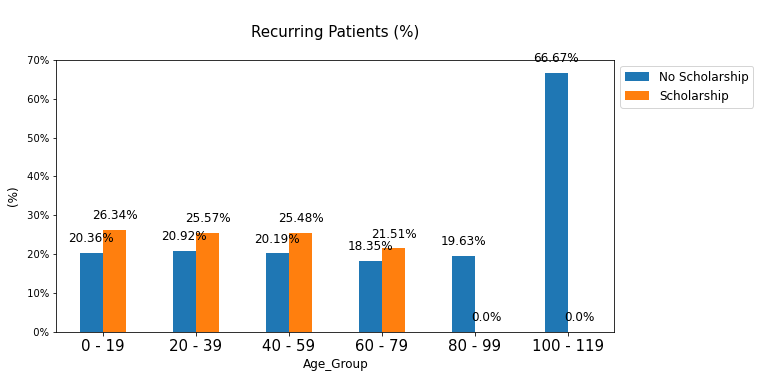

In [205]:
Recurring_Patient_prct(No_Show_df,'Age_Group' ,'Scholarship')

In [206]:
# The No ShowUp (%) chart shows us that:

# The age group (20-39) account for the greatest percentage of no-show appointments (15.23%) where patients have scholarship
# The age group (100-119) account for the greatest percentage of no-show appointments (100%) where patients have no scholarship

# The Recurring patients (%) chart shows us that:

# The age group (0-19) account for the greatest percentage of recurring patients who have scholarship (26.34%)
# The age group (100-119) account for the greatest percentage of recurring patients who have no scholarship (66.67%)

In [207]:
# Q4.2.3 NoShowUp (%) (per Age Group per Hypertension)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Hypertension,No Hypertension,Hypertension
Age_Group,,
0 - 19,99.81,0.19
20 - 39,95.31,4.69
40 - 59,72.19,27.81
60 - 79,44.28,55.72
80 - 99,31.68,68.32
100 - 119,100.00,0.00


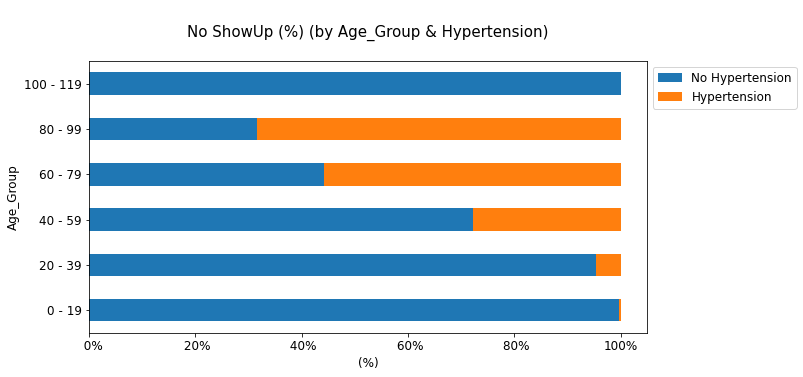

In [208]:
NoShowBy2Vars(No_Show_df,'Age_Group' ,'Hypertension')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Hypertension,No Hypertension,Hypertension
Age_Group,,
0 - 19,21.07,38.46
20 - 39,21.56,23.00
40 - 59,20.55,21.36
60 - 79,19.38,17.73
80 - 99,19.08,19.84
100 - 119,66.67,NaN


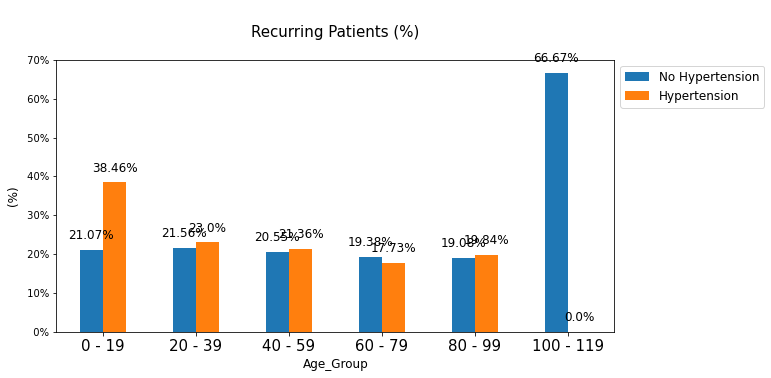

In [209]:
Recurring_Patient_prct(No_Show_df,'Age_Group' ,'Hypertension')

In [210]:
# The No ShowUp (%) chart shows us that:

# The age group (0-19) accounts for the greatest percentage of no-show appointments where patients have hypertension
# The age group (100-119) accounts for the greatest percentage of no-show appointments where patients have no hypertension

# The Recurring patients (%) chart shows us that:

# The age group (0-19) accounts for the greatest percentage of recurring patients who have hypertension
# The age group (100-119) accounts for the greatest percentage of recurring patients who have no hypertension

In [211]:
# Q4.2.4 NoShowUp (%) (per Age Group per Diabetes)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Diabetes,No Diabetes,Diabetes
Age_Group,,
0 - 19,99.76,0.24
20 - 39,98.49,1.51
40 - 59,90.43,9.57
60 - 79,76.00,24.00
80 - 99,76.92,23.08
100 - 119,100.00,0.00


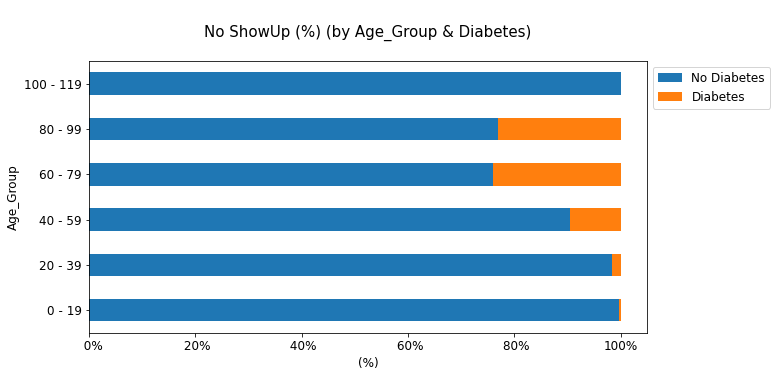

In [212]:
NoShowBy2Vars(No_Show_df,'Age_Group' ,'Diabetes')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Diabetes,No Diabetes,Diabetes
Age_Group,,
0 - 19,21.11,18.75
20 - 39,21.68,17.82
40 - 59,20.80,20.52
60 - 79,18.18,19.35
80 - 99,20.00,18.25
100 - 119,66.67,NaN


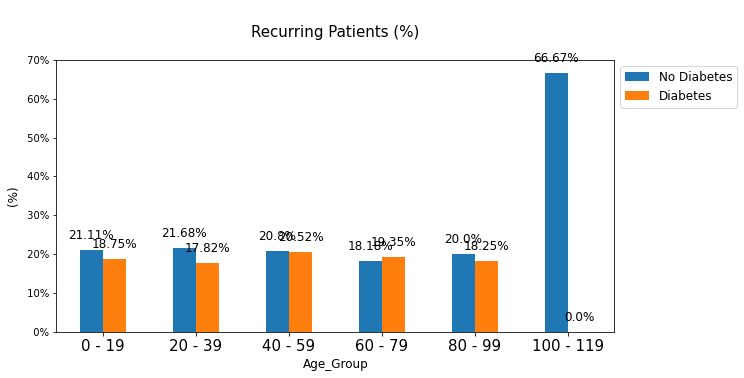

In [213]:
Recurring_Patient_prct(No_Show_df,'Age_Group' ,'Diabetes')

In [214]:
# The No ShowUp (%) chart shows us that:

# The age group (60-79) accounts for the greatest percentage of no-show appointments where patients have diabetes (24%)
# The age group (100-119) accounts for the greatest percentage of no-show appointments where patients do not have diabetes (100%)

# The Recurring patients (%) charts shows us that:

# The age group (40-59) accounts for the greatest percentage of recurring patients that have diabetes (20.52%)
# The age group (110-119) accounts for the greatest percentage pf recurring patients that have no diabetes (66.67%)

In [215]:
# Q4.2.5 NoShowUp (%) (per Age Group per Alcoholism)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Alcoholism,No Alcoholism,Alcoholism
Age_Group,,
0 - 19,99.81,0.19
20 - 39,97.29,2.71
40 - 59,93.39,6.61
60 - 79,95.99,4.01
80 - 99,99.82,0.18
100 - 119,100.00,0.00


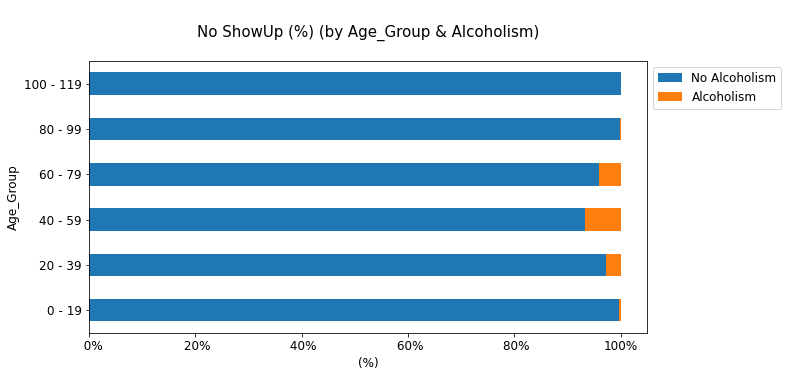

In [216]:
NoShowBy2Vars(No_Show_df,'Age_Group' ,'Alcoholism')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Alcoholism,No Alcoholism,Alcoholism
Age_Group,,
0 - 19,21.02,61.54
20 - 39,21.56,23.76
40 - 59,20.58,23.53
60 - 79,18.54,16.67
80 - 99,19.63,0.00
100 - 119,66.67,NaN


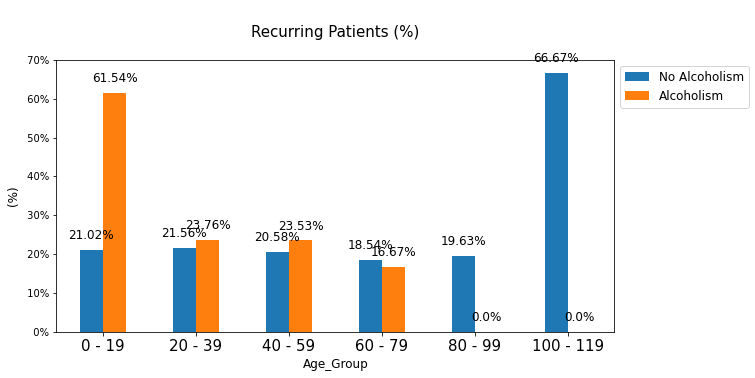

In [217]:
Recurring_Patient_prct(No_Show_df,'Age_Group' ,'Alcoholism')

In [218]:
# The No ShowUp (%) chart shows us that:

# The age group (40-59) accounts for the greatest percentage of no-show appointments where patients have alcoholism (6.61%)
# The age group (100-119) accounts for the greatest percentage of no-show appointments where patients have no alcoholism (100%)

# The Recurring patients (%) chart shows us that:

# The age group (0-19) accounts for the greatest percentage of recurring patients who have alcoholism (61.54%)
# The age group (100-119) accounts for the greatest percentage of recurring patients who have no alcoholism (66.67%)

In [219]:
# Q4.2.6 NoShowUp (%) (per Age Group per Handicap)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Handicap,No Handicap,Handicap L1,Handicap L2,Handicap L3,Handicap L4
Age_Group,,,,,
0 - 19,98.86,1.04,0.06,0.03,0.01
20 - 39,98.88,1.03,0.09,0.00,0.00
40 - 59,97.95,1.89,0.16,0.00,0.00
60 - 79,96.99,2.79,0.19,0.04,0.00
80 - 99,90.29,7.33,2.38,0.00,0.00
100 - 119,0.00,100.00,0.00,0.00,0.00


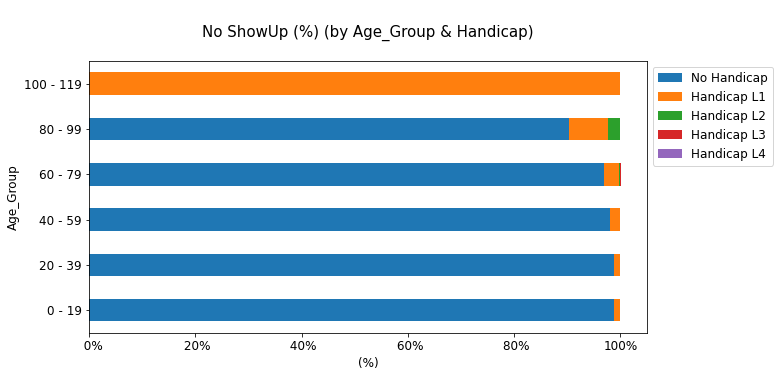

In [220]:
NoShowBy2Vars(No_Show_df,'Age_Group' ,'Handicap')

In [221]:
# The No ShowUp (%) chart shows us that:

# The age group (20-39) accounts for the greatest percentage of of no-show appointments where patients are not handicapped (98.88%)
# The age group (100-119) accounts for the greatest percentage of no-show appointments where patients have handicap L1 condition (100%)

# THe Recurring patients (%) chart shows us that:

# The age group (20-39) accounts for the greatest percentage of recurring patients who are no handicapped (21.44%)
# The age group (110-119) accounts for the greatest percentage of recurring patients who have handicap L1 condition (66.67%)

In [222]:
# Q4.2.7 NoShowUp (%) (per Age Group per SMS_received)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


SMS_Received,No SMS_received,SMS_received
Age_Group,,
0 - 19,58.87,41.13
20 - 39,51.15,48.85
40 - 59,56.24,43.76
60 - 79,59.25,40.75
80 - 99,67.40,32.60
100 - 119,100.00,0.00


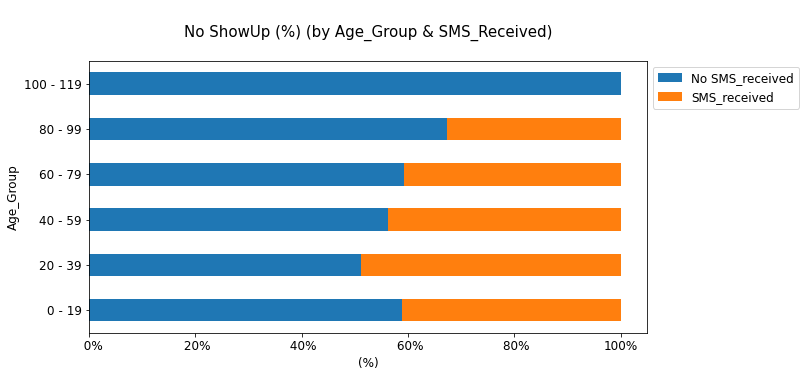

In [223]:
NoShowBy2Vars(No_Show_df,'Age_Group' ,'SMS_Received')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


SMS_Received,No SMS_received,SMS_received
Age_Group,,
0 - 19,19.31,8.80
20 - 39,16.42,11.01
40 - 59,15.22,10.75
60 - 79,13.04,9.39
80 - 99,16.85,11.80
100 - 119,66.67,NaN


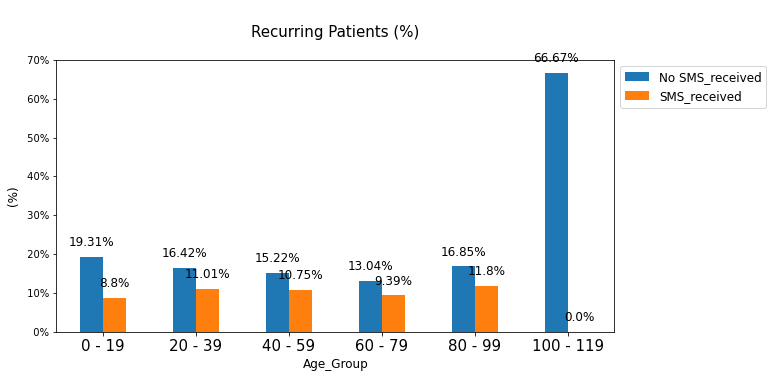

In [224]:
Recurring_Patient_prct(No_Show_df,'Age_Group' ,'SMS_Received')

In [225]:
# The No ShowUp (%) chart shows us that:

# The age group (20-39) accounts for the greatest percentage of no-show appointments where patients did receive an SMS reminder (48.85%)
# The age group (100-119) accounts for the greatest percentage of no-show appointments where patients did not receive an SMS reminder (100%)

# The Recurring patients (%) chart shows us that:

# The age group (80-99) accounts for the greatest percentage of recurring patients who did receive an SMS reminder (11.80%)
# The age group (100-119) accounts for the greatest percentage of recurring patients who did not receive an SMS reminder (66.67%)

In [226]:
# Q4.2.8 NoShowUp (%) (per Age Group per Day_Of_Week)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Day_Of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Age_Group,,,,,,
0 - 19,20.36,21.93,24.04,14.97,18.68,0.01
20 - 39,20.96,23.47,22.85,14.54,18.15,0.03
40 - 59,21.92,23.57,21.71,15.28,17.49,0.04
60 - 79,21.66,23.48,21.43,15.49,17.83,0.11
80 - 99,17.03,25.64,25.82,13.55,17.77,0.18
100 - 119,33.33,0.00,0.00,66.67,0.00,0.00


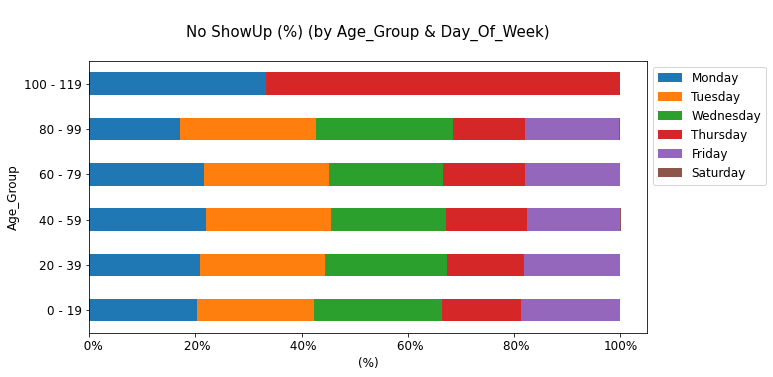

In [227]:
NoShowBy2Vars(No_Show_df,'Age_Group' ,'Day_Of_Week')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Day_Of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Age_Group,,,,,,
0 - 19,7.94,11.43,17.35,10.31,14.54,0.0
20 - 39,10.50,11.93,10.55,7.72,10.15,0.0
40 - 59,13.31,11.85,9.61,5.21,9.91,0.0
60 - 79,9.43,12.66,6.93,8.39,6.46,0.0
80 - 99,8.60,15.71,14.89,5.41,8.25,0.0
100 - 119,0.00,NaN,NaN,50.00,NaN,NaN


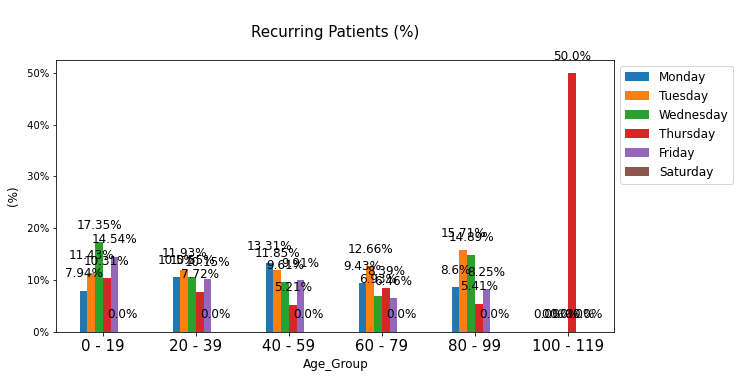

In [228]:
Recurring_Patient_prct(No_Show_df,'Age_Group' ,'Day_Of_Week')

In [229]:
# The No ShowUp (%) chart shows us that:

# The age group (100-119) accounts for the greatest percentage of no-show appointments where patients were scheduled for Thursdays appointments (66.67%)

# The Recurring patients (%) chart shows us that:

# The age group (100-119) accounts for the greatest percentage of recurring patients who were scheduled for Thursday appointments (50%)

In [230]:
# Q4.2.9 NoShowUp (%) (per Age Group per Waiting_Duration_Groups)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Waiting_Duration_Groups,0 - 29,30 - 59,60 - 89,90 - 119,120 - 149,150 - 179
Age_Group,,,,,,
0 - 19,82.99,15.30,1.53,0.15,0.03,0.00
20 - 39,84.52,13.27,2.11,0.07,0.00,0.03
40 - 59,83.88,13.30,2.49,0.18,0.07,0.09
60 - 79,84.40,9.62,5.20,0.33,0.15,0.30
80 - 99,81.87,10.26,5.86,1.28,0.18,0.55
100 - 119,66.67,33.33,0.00,0.00,0.00,0.00


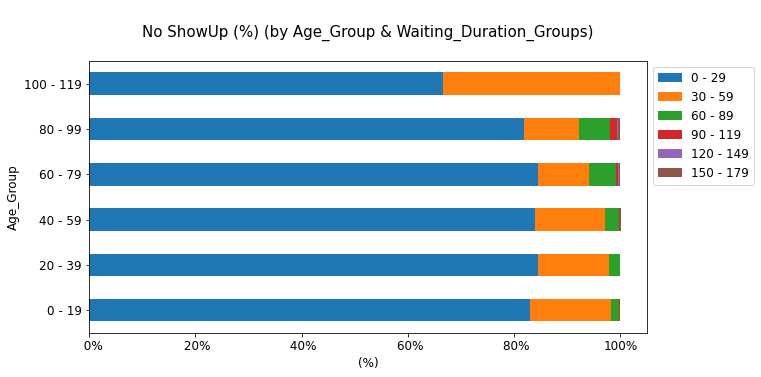

In [231]:
NoShowBy2Vars(No_Show_df,'Age_Group' ,'Waiting_Duration_Groups')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Waiting_Duration_Groups,0 - 29,30 - 59,60 - 89,90 - 119,120 - 149,150 - 179
Age_Group,,,,,,
0 - 19,21.67,5.43,9.71,0.0,0.0,NaN
20 - 39,20.71,10.38,10.64,0.0,NaN,0.0
40 - 59,19.37,11.44,4.96,0.0,0.0,0.0
60 - 79,18.27,7.72,3.57,0.0,0.0,12.5
80 - 99,16.78,16.07,12.50,0.0,0.0,0.0
100 - 119,50.00,0.00,NaN,NaN,NaN,NaN


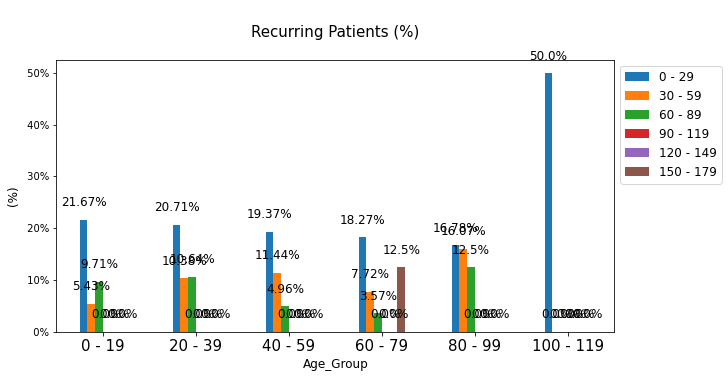

In [232]:
Recurring_Patient_prct(No_Show_df,'Age_Group' ,'Waiting_Duration_Groups')

In [233]:
# The No ShowUp (%) chart shows us that:

# The age group (28-39) accounts for the greatest percentage of no-show appointments where patients had a waiting duration of 0-29 days (84.52%)

# The Recurring patients (%) chart shows us that:

# The age group (100-119) accounts for the greatest percentage of recurring patients who had a waiting duration of 0-29 days (50%)

In [234]:
# Q4.3 SMS Received

In [235]:
# Q4.3.1 NoShowUp (%) (per SMS_received per Gender)

    # Addressed in Q4.1.6

In [236]:
# Q4.3.2 NoShowUp (%) (per SMS_received per Age Groups)

    # Addressed in Q4.2.7

In [237]:
# Q4.3.3 NoShowUp (%) (per SMS_received per Neighbourhood)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Neighbourhood,ANDORINHAS,BONFIM,CARATOÍRA,CENTRO,DA PENHA,ILHA DO PRÍNCIPE,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,MARIA ORTIZ,NOVA PALESTINA,RESISTÊNCIA,ROMÃO,SANTA MARTHA,SANTO ANDRÉ,SANTO ANTÔNIO,SÃO PEDRO,TABUAZEIRO
SMS_Received,,,,,,,,,,,,,,,,,,,,
No SMS_received,4.70,4.66,6.12,5.55,3.58,3.84,6.83,3.19,11.30,4.59,5.53,7.88,3.00,6.21,3.23,3.47,3.50,3.99,4.43,4.40
SMS_received,3.07,3.63,2.48,5.17,2.90,4.37,7.37,3.79,11.11,5.13,5.06,11.19,3.18,7.84,4.14,4.21,4.38,3.30,3.32,4.35


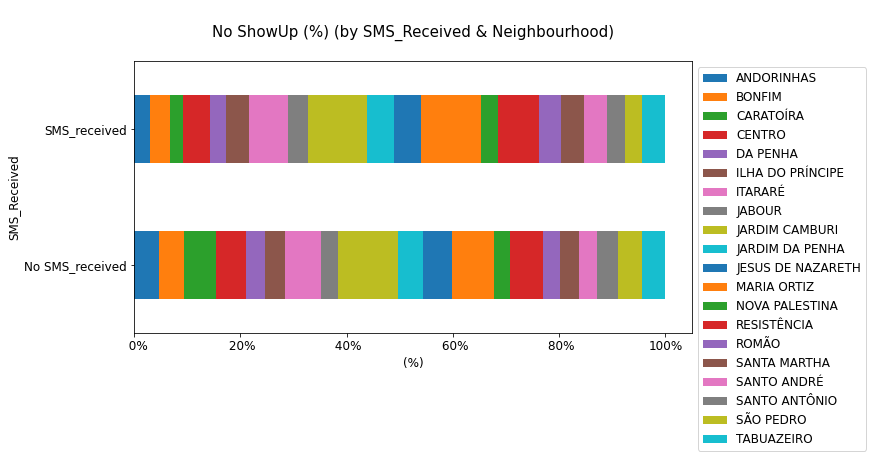

In [238]:
NoShowBy2Vars(df_top_20_Nbrhd_NoShow,'SMS_Received' ,'Neighbourhood')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Neighbourhood,ANDORINHAS,BONFIM,CARATOÍRA,CENTRO,DA PENHA,ILHA DO PRÍNCIPE,ITARARÉ,JABOUR,JARDIM CAMBURI,JARDIM DA PENHA,JESUS DE NAZARETH,MARIA ORTIZ,NOVA PALESTINA,RESISTÊNCIA,ROMÃO,SANTA MARTHA,SANTO ANDRÉ,SANTO ANTÔNIO,SÃO PEDRO,TABUAZEIRO
SMS_Received,,,,,,,,,,,,,,,,,,,,
No SMS_received,23.48,14.62,17.37,16.46,15.59,25.53,15.97,12.39,17.97,11.87,14.29,15.22,16.36,16.89,21.94,15.29,22.18,17.75,15.08,16.72
SMS_received,10.80,5.77,2.82,9.12,10.84,15.60,8.77,10.14,9.28,7.48,15.86,9.05,8.79,11.36,12.66,8.71,20.72,7.94,11.05,8.84


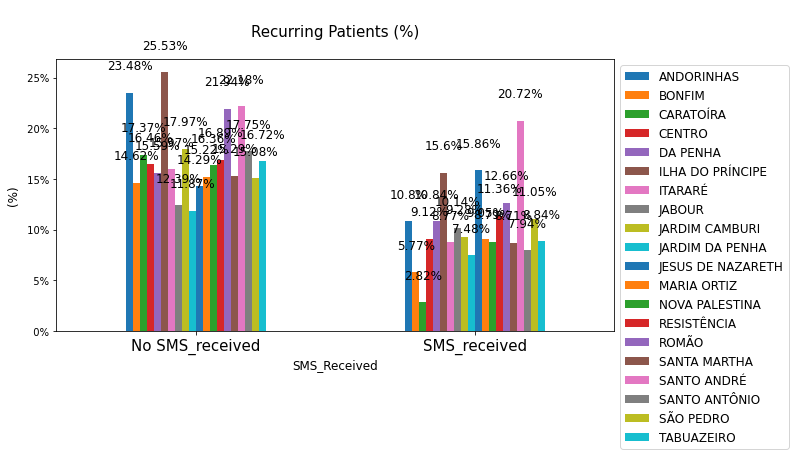

In [239]:
Recurring_Patient_prct(df_top_20_Nbrhd_NoShow,'SMS_Received' ,'Neighbourhood')

In [240]:
# The No ShowUp (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients based in MARIA ORTIZ accounts for the greatest percentage of no-show appointments (11.19%)
# For patients who did not receive an SMS reminder, the patients based in JARDIM CAMBURI accounts for the greatest percentage of no-show appointments (11.30%)

# The Recurring patients (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients based in SANTO ANDRÉ accounts for the greatest percentage of recurring patients (20.72%)
# For patients who did not receive an SMS reminder, the patients based in ILHA DO PRÍNCIPE accounts for the greatest percentage of recurring patients (25.53%)

In [241]:
# Q4.3.4 NoShowUp (%) (per SMS_received per Scholarship)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Scholarship,No Scholarship,Scholarship
SMS_Received,,
No SMS_received,88.87,11.13
SMS_received,87.90,12.10


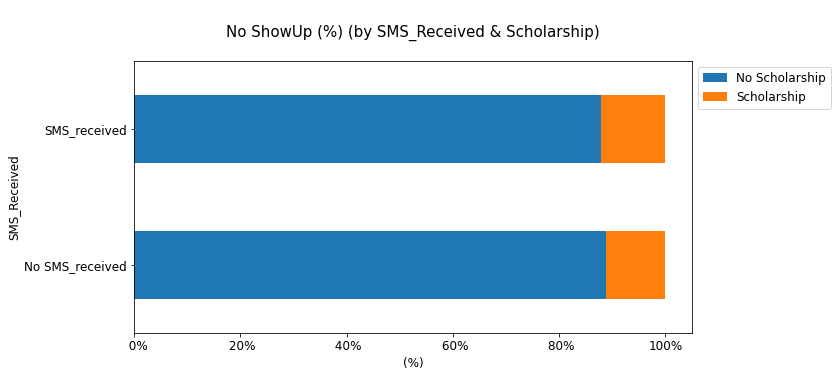

In [242]:
NoShowBy2Vars(No_Show_df,'SMS_Received' ,'Scholarship')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Scholarship,No Scholarship,Scholarship
SMS_Received,,
No SMS_received,16.09,20.95
SMS_received,9.72,13.51


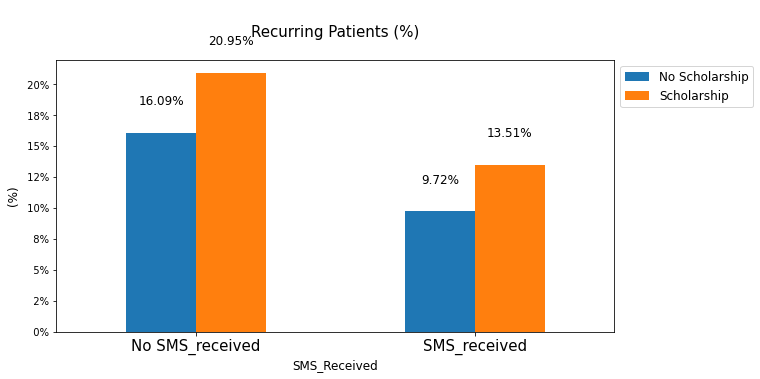

In [243]:
Recurring_Patient_prct(No_Show_df,'SMS_Received' ,'Scholarship')

In [244]:
# The No ShowUp (%)* chart show us that:

# For patients who did receive an SMS reminder, the patients who did not have a scholarship accounts for the greatest percentage of no-show appointments (87.90%)
# For patients who did not receive an SMS reminder, the patients who did not have a scholarship accounts for the greatest percentage of no-show appointments (88.87%)

# The Recurring patients (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients who have a scholarship accounts for the greatest percentage of recurring patients (13.51%)
# For patients who did not receive an SMS reminder, the patients who have a scholarship accounts fo the greatest percentage of recurring patients (20.95%)

In [245]:
# Q4.3.5 NoShowUp (%) (per SMS_received per Hypertension)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Hypertension,No Hypertension,Hypertension
SMS_Received,,
No SMS_received,82.23,17.77
SMS_received,84.21,15.79


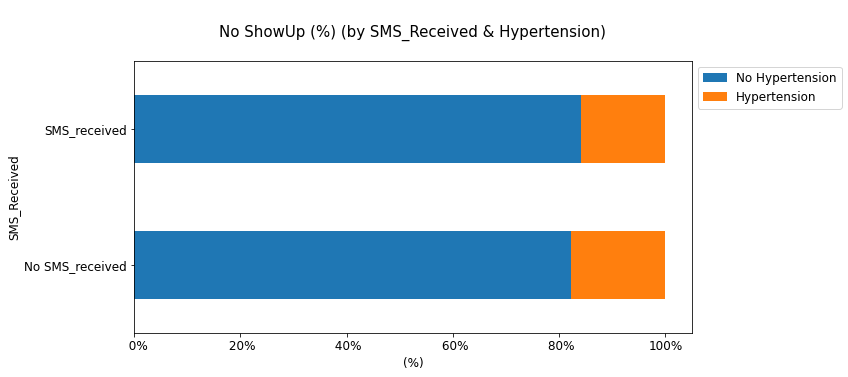

In [246]:
NoShowBy2Vars(No_Show_df,'SMS_Received' ,'Hypertension')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Hypertension,No Hypertension,Hypertension
SMS_Received,,
No SMS_received,17.01,14.86
SMS_received,10.04,10.94


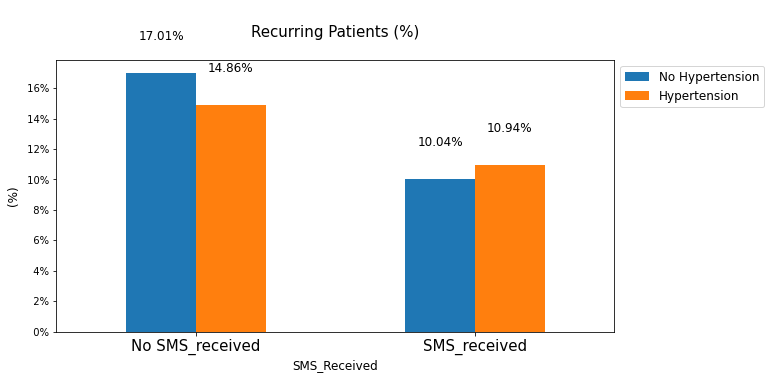

In [247]:
Recurring_Patient_prct(No_Show_df,'SMS_Received' ,'Hypertension')

In [248]:
# The No ShowUp (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients who did not have hypertension accounts for the greatest percentage of no-show appointments (84.21%)
# For patients who did not receive an SMS reminder, the patients who did not have hypertension accounts for the greatest percentage of no-show appointments (82.23%)

# The Recurring patients (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients who have hypertension accounts for the greatest percentage of recurring patients (10.94%)
# For patients who did not receive an SMS reminder, the patients who do not have hypertension accounts for the greatest percentage of recurring patients (17.01%)

In [249]:
# Q4.3.6 NoShowUp (%) (per SMS_Received per Diabetes)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Diabetes,No Diabetes,Diabetes
SMS_Received,,
No SMS_received,92.93,7.07
SMS_received,94.44,5.56


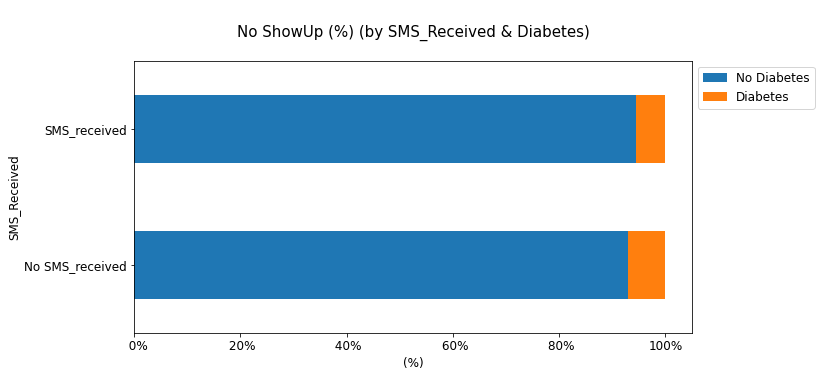

In [250]:
NoShowBy2Vars(No_Show_df,'SMS_Received' ,'Diabetes')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Diabetes,No Diabetes,Diabetes
SMS_Received,,
No SMS_received,16.84,13.88
SMS_received,10.25,9.01


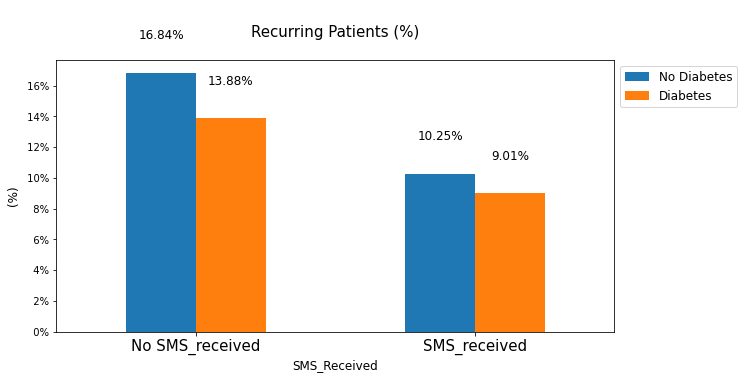

In [251]:
Recurring_Patient_prct(No_Show_df,'SMS_Received' ,'Diabetes')

In [252]:
# THe No ShowUp (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients who do not have diabetes accounts for the greatest percentage of no-show appointments (94.44%)
# For patients who did not receive an SMS reminder, the patients who do not have diabetes accounts for hte greatest percentage of no-show appointments (92.93%)

# The Recurring patients (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients who do not have diabetes accounts for the greatest percentage of recurring patients (10.25%)
# For patients who did not receive an SMS reminder, the patients who do not have diabetes accounts for the greatest percentage of recurring patients (16.84%)

In [253]:
# Q4.3.7 NoShowUp (%) (per SMS_Received per Alcoholism)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Alcoholism,No Alcoholism,Alcoholism
SMS_Received,,
No SMS_received,96.81,3.19
SMS_received,97.17,2.83


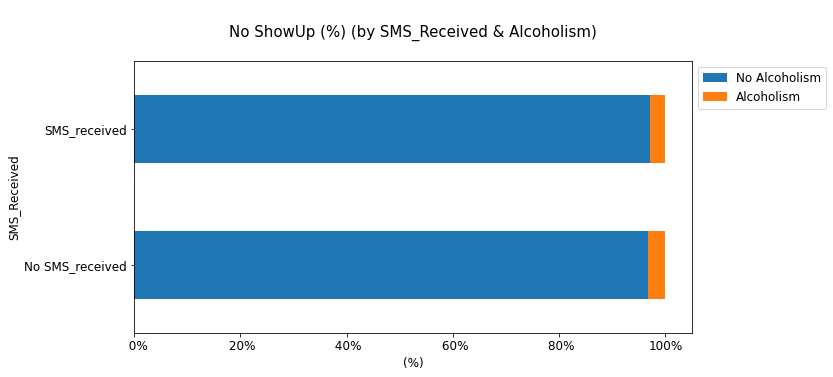

In [254]:
NoShowBy2Vars(No_Show_df,'SMS_Received' ,'Alcoholism')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Alcoholism,No Alcoholism,Alcoholism
SMS_Received,,
No SMS_received,16.64,16.50
SMS_received,10.09,13.36


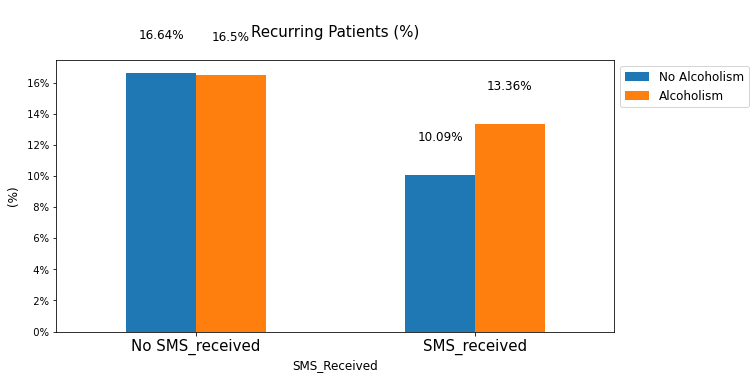

In [255]:
Recurring_Patient_prct(No_Show_df,'SMS_Received' ,'Alcoholism')

In [256]:
# The No ShowUp (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients who do not have alcoholism accounts for the greatest percentage of no-show appointments (97.17%)
# For patients who did not receive an SMS reminder, the patients who do not have alcoholism accounts for the greatest percentage of no-show appointments (96.81%)

# The Recurring patients (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients who have alcoholism accounts for the greatest percentage of recurring patients (13.26%)
# For patients who did not receive an SMS reminder, the patients who do not have alcoholism accounts fo the greatest percentage of recurring patients (16.64%)

In [257]:
# Q4.3.8 NoShowUp (%) (per SMS_Received per Handicap)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Handicap,No Handicap,Handicap L1,Handicap L2,Handicap L3,Handicap L4
SMS_Received,,,,,
No SMS_received,97.85,1.90,0.24,0.02,0.00
SMS_received,98.62,1.29,0.07,0.01,0.01


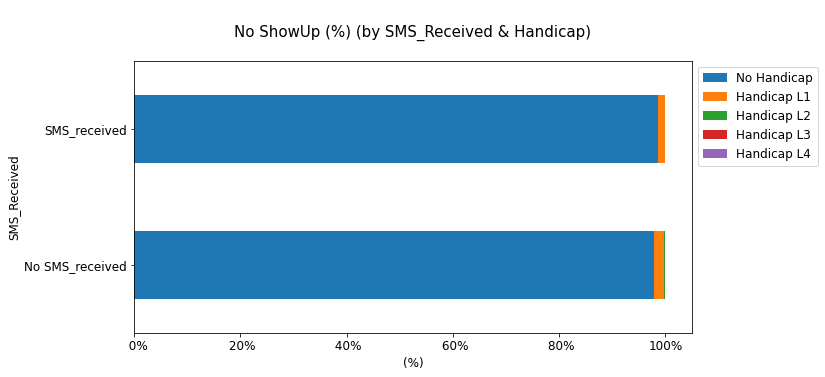

In [258]:
NoShowBy2Vars(No_Show_df,'SMS_Received' ,'Handicap')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Handicap,No Handicap,Handicap L1,Handicap L2,Handicap L3,Handicap L4
SMS_Received,,,,,
No SMS_received,16.29,34.03,20.00,0.0,NaN
SMS_received,10.14,12.70,28.57,0.0,0.0


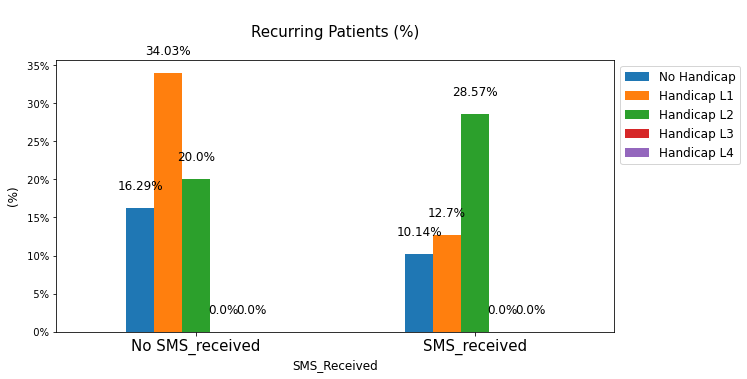

In [259]:
Recurring_Patient_prct(No_Show_df,'SMS_Received' ,'Handicap')

In [260]:
# The No ShowUp (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients who are not handicapped accounts for the greatest percentage of no-show appointments (98.62%)
# For patients who did not receive an SMS reminder, the patients who are not handicapped accounts for the greatest percentage of no-show appointments (97.85%)

# The Recurring patients (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients who have Handicap L2 condition accounts for the greatest percentage of recurring patients (28.57%)
# For patients who did not receive an SMS reminder, the patients who have Handicap L1 condition accounts for the greatest percentage of recurring patients (34.03%)

In [260]:
# Q4.3.9 NoShowUp (%) (per SMS_Received per Day_Of_Week)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Day_Of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
SMS_Received,,,,,,
No SMS_received,21.85,17.94,21.43,15.65,23.08,0.05
SMS_received,19.94,29.66,24.60,14.06,11.70,0.03


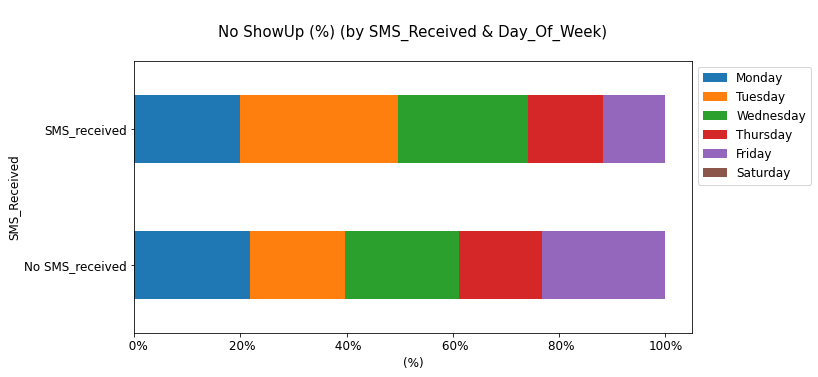

In [261]:
NoShowBy2Vars(No_Show_df,'SMS_Received' ,'Day_Of_Week')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Day_Of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
SMS_Received,,,,,,
No SMS_received,7.45,10.32,11.10,7.24,10.75,0.0
SMS_received,3.64,5.10,4.07,1.89,0.70,0.0


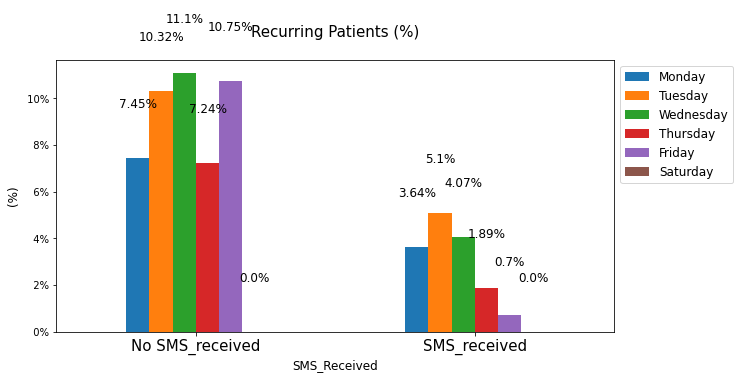

In [262]:
Recurring_Patient_prct(No_Show_df,'SMS_Received' ,'Day_Of_Week')

In [ ]:
# The No ShowUp (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients who were scheduled for Tuesdays appointments accounts for the greatest percentage of no-show appointments (29.66%)
# For patients who did not receive an SMS reminder, the patients who were scheduled for Fridays appointments accounts for the greatest percentage of no-show appointments (23.08%)

# The Recurring patients (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients who were scheduled for Tuesdays appointments accounts for the greatest percentage of recurring patients (5.10%)
# For patients who did not receive an SMS reminder, the patients who were scheduled for Wednesdays appointments accounts for the greatest percentage of recurring patients (11.10%)

In [ ]:
# Q4.3.10 NoShowUp (%) (per SMS_Received per Waiting_Duration_Groups)

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


Waiting_Duration_Groups,0 - 29,30 - 59,60 - 89,90 - 119,120 - 149,150 - 179
SMS_Received,,,,,,
No SMS_received,87.42,10.41,2.01,0.08,0.04,0.04
SMS_received,79.19,17.18,3.12,0.32,0.06,0.13


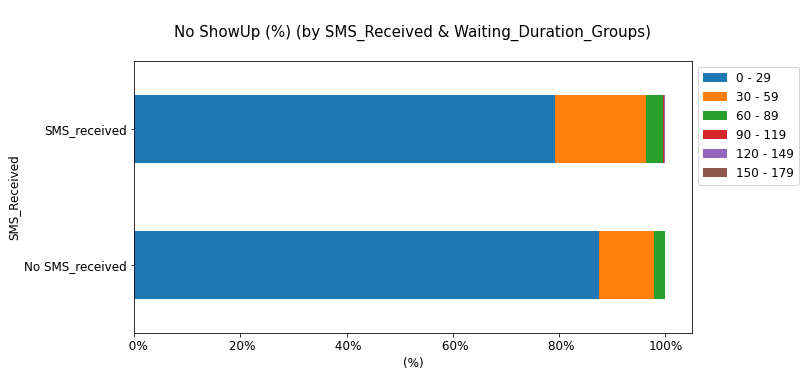

In [263]:
NoShowBy2Vars(No_Show_df,'SMS_Received' ,'Waiting_Duration_Groups')

/Users/sa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


Waiting_Duration_Groups,0 - 29,30 - 59,60 - 89,90 - 119,120 - 149,150 - 179
SMS_Received,,,,,,
No SMS_received,16.73,6.21,5.56,0.0,0.0,0.0
SMS_received,9.14,3.39,1.31,0.0,0.0,0.0


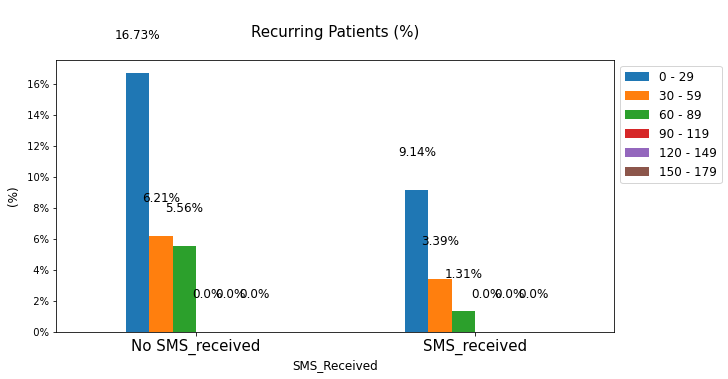

In [264]:
Recurring_Patient_prct(No_Show_df,'SMS_Received' ,'Waiting_Duration_Groups')

In [ ]:
# The No ShowUp (%) chart shows us that

# For patients who did receive an SMS reminder, the patients who had a waiting duration of 0-29 days accounts for the greatest percentage of no-show appointments (79.19%)
# For patients who did not receive an SMS reminder, the patients who had a waiting duration of 0-29 days accounts for the greatest percentage of no-show appointments (87.42%)

# The Recurring patients (%) chart shows us that:

# For patients who did receive an SMS reminder, the patients who had a waiting duration of 0-29 days account for the highest percentage of recurring patients (9.14%)
# For patients who did not receive an SMS reminder, the patients who had a waiting duration of 0-29 days account for the highest percentage of recurring patients (16.73%)


